<h1>Investigación del mercado automotor</h1>
<p>Hemos sido contratados en el equipo de ciencias de datos en una consultora de renombre. Nos han asignado a un proyecto de estudio de mercado de una importante automotriz china. Nuestro cliente desea ingresar a nuestro mercado de automóviles, por lo que nos han encomendado analizar las características de los vehículos presentes en el mercado actual. Dado que tienen en su catálogo una amplia colección de modelos de todo tipo, cuyo catálogo está estratificado en gamas según el gusto de cada región, desean saber qué características presentan los vehículos de gama alta y los de gama baja en nuestro mercado, para poder abarcar todo los públicos objetivos ajustándose a toda la demanda y, en base a estos datos, poder cotizar correctamente los vehículos que ofrecerá.</p>
<p>Para ello, nuestro departamento de datos ha recopilado precios y características de varios de los modelos de vehículos disponibles en nuestro mercado, junto con sus precios de venta al público.</p>
<p>Nuestro Data Lead nos ha recomendado que analicemos detalladamente los datos, los preprocesemos debidamente y que diseñemos dos modelos predictivos, uno para el precio y otro para distinguir vehículos de gama alta y de gama baja, utilizando la mediana de los precios como punto de corte. Desean obtener los archivos con las predicciones en formato de texto plano.</p>
<p>Además del análisis detallado de la exploración de los datos, estas son las dos predicciones posibles que les interesaría analizar:</p>

1.   Implementar un modelo de clasificación con aprendizaje supervisado que permita clasificar el precio de los vehículos en baratos y caros usando la mediana de los precios como punto de corte, utilizando los datos que se han puesto a su disposición.
2.   Implementar un modelo de regresión con aprendizaje supervisado que permita predecir el precio final de los vehículos, utilizando los datos que se han puesto a su disposición.



# 1. Análisis Exploratorio

## Importar archivo CSV

In [71]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_csv("ML_cars.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [74]:
df.rename({"CarName":"carname"}, axis="columns", inplace="True")
df.head()

,car_ID,symboling,carname,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Exploración de los datos

<p>Por lo visto, no hay datos nulos en el dataset, y los nombres de columnas son cómodos para trabajar, por lo que se procederá a revisar los tipos y valores de las columnas.

In [75]:
for c in df.columns:
  print(f"Valores de la columna {c}: {df[c].unique()}")
  print(f"Cantidad de valores de la columna {c}: {len(df[c].unique())}\n")

Valores de la columna car_ID: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205]
Cantidad de valores de la columna car_ID: 205

Valores de la columna symboling: [ 3  1  2  0 -1 -2]
Cantidad de valores de la columna sym

<p>Algunas columnas presentan una cardinalidad relativamente alta, pero puede que sean numéricas. A continuación se limitará el análisis a las columnas categóricas.

In [76]:
for c in df.select_dtypes(include="object").columns:
  print(f"Valores de la columna {c}: {df[c].unique()}")
  print(f"Cantidad de valores de la columna {c}: {len(df[c].unique())}\n")

Valores de la columna carname: ['alfa-romero giulia' 'alfa-romero stelvio' 'alfa-romero Quadrifoglio'
 'audi 100 ls' 'audi 100ls' 'audi fox' 'audi 5000' 'audi 4000'
 'audi 5000s (diesel)' 'bmw 320i' 'bmw x1' 'bmw x3' 'bmw z4' 'bmw x4'
 'bmw x5' 'chevrolet impala' 'chevrolet monte carlo' 'chevrolet vega 2300'
 'dodge rampage' 'dodge challenger se' 'dodge d200' 'dodge monaco (sw)'
 'dodge colt hardtop' 'dodge colt (sw)' 'dodge coronet custom'
 'dodge dart custom' 'dodge coronet custom (sw)' 'honda civic'
 'honda civic cvcc' 'honda accord cvcc' 'honda accord lx'
 'honda civic 1500 gl' 'honda accord' 'honda civic 1300' 'honda prelude'
 'honda civic (auto)' 'isuzu MU-X' 'isuzu D-Max ' 'isuzu D-Max V-Cross'
 'jaguar xj' 'jaguar xf' 'jaguar xk' 'maxda rx3' 'maxda glc deluxe'
 'mazda rx2 coupe' 'mazda rx-4' 'mazda glc deluxe' 'mazda 626' 'mazda glc'
 'mazda rx-7 gs' 'mazda glc 4' 'mazda glc custom l' 'mazda glc custom'
 'buick electra 225 custom' 'buick century luxus (sw)' 'buick century'
 'bu

<p>Entre las columnas categóricas, la columna carname presenta 147 valores distintos (más de la mitad del tamaño del dataset), y la columna car_ID 205 (un valor distinto para cada registro), ambas siendo cardinalidades bastante altas. Por tanto, se eliminarán del modelo. La columna car_ID, a pesar de estar asignada como número, no representa una medida, sino una característica.

In [77]:
df.drop(["car_ID", "carname"], axis="columns", inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

## Conversión de tipos

In [78]:
df = df.astype({"symboling":np.int16, "wheelbase":np.float32, "carlength":np.float32,
                "carwidth":np.float32, "carheight":np.float32, "curbweight":np.int16,
                "enginesize":np.int16, "boreratio":np.float32, "stroke":np.float32,
                "compressionratio":np.float32, "horsepower":np.int16, "peakrpm":np.int16,
                "citympg":np.int16, "highwaympg":np.int16, "price":np.float32})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int16  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float32
 8   carlength         205 non-null    float32
 9   carwidth          205 non-null    float32
 10  carheight         205 non-null    float32
 11  curbweight        205 non-null    int16  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int16  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float32
 1

## Codificación de categorías

<p>Para un mejor enfoque, se convertirán las categorías binarias a valores 1/0 (One Hot), o a números en el caso en que representan números.

In [79]:
#Columna fueltype: 1 para diesel, 0 para gas
df.fueltype = df.fueltype.replace({"diesel":1, "gas":0}).astype(np.int16)

In [80]:
#Columna aspiration: 1 para turbo, 0 para std
df.aspiration = df.aspiration.replace({"turbo":1, "std":0}).astype(np.int16)

In [81]:
#Columna doornumber: Se reemplazarán por su valor numérico
df.doornumber = df.doornumber.replace({"two":2, "four":4}).astype(np.int16)

In [82]:
#Columna enginelocation: 1 para front, 0 para rear
df.enginelocation = df.enginelocation.replace({"front":1, "rear":0}).astype(np.int16)

In [83]:
df.cylindernumber.unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [84]:
#Columna cylindernumber: Se reemplazarán por su valor numérico
df.cylindernumber = df.cylindernumber.replace({"two":2, "three":3, "four":4, "five":5,
                                               "six":6, "eight":8, "twelve":12}).astype(np.int16)

In [85]:
#Se renombraron las columnas codificadas con One Hot para reflejar la codificación adoptada
df.rename({"fueltype":"fueltype_diesel", "aspiration":"aspiration_turbo", "enginelocation":"enginelocation_front"}, axis="columns", inplace=True)

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int16  
 1   fueltype_diesel       205 non-null    int16  
 2   aspiration_turbo      205 non-null    int16  
 3   doornumber            205 non-null    int16  
 4   carbody               205 non-null    object 
 5   drivewheel            205 non-null    object 
 6   enginelocation_front  205 non-null    int16  
 7   wheelbase             205 non-null    float32
 8   carlength             205 non-null    float32
 9   carwidth              205 non-null    float32
 10  carheight             205 non-null    float32
 11  curbweight            205 non-null    int16  
 12  enginetype            205 non-null    object 
 13  cylindernumber        205 non-null    int16  
 14  enginesize            205 non-null    int16  
 15  fuelsystem            2

In [87]:
#Columnas numéricas
#Se excluyeron como columnas numéricas aquellas que representan una categorización
boolean_cols = ["fueltype_diesel", "aspiration_turbo", "enginelocation_front"]
numeric_cols = [c for c in df.select_dtypes(include="number").columns if c not in boolean_cols]
numeric_cols

['symboling',
 'doornumber',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

In [88]:
#Columnas categóricas
cat_cols = df.select_dtypes(include="object").columns
cat_cols

Index(['carbody', 'drivewheel', 'enginetype', 'fuelsystem'], dtype='object')

## Análisis de correlación

Text(0.5, 1.0, 'Correlación entre las variables numéricas')

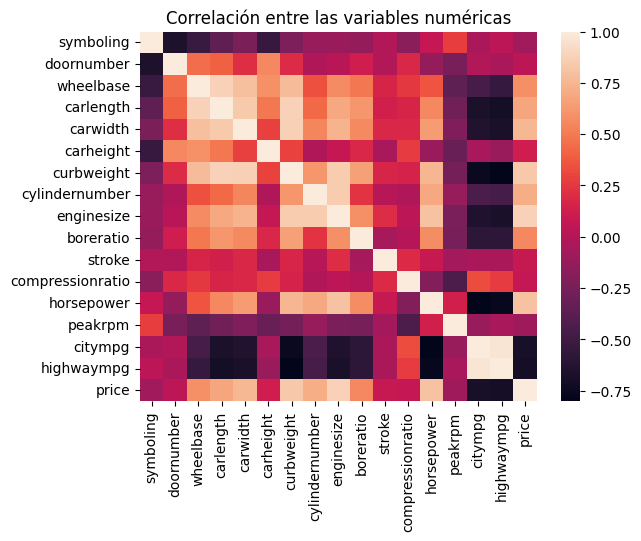

In [89]:
corr = df[numeric_cols].corr()
sns.heatmap(corr)
plt.title("Correlación entre las variables numéricas")

<p>Se encontraron varios pares de columnas con alta correlación (directa e inversa). A simple vista, se nota que las columnas wheelbase, carlength, carwidth, curbweight, cylindernumber, enginesize, boreratio, horsepower, citympg y highwaympg presentan alta correlación entre sí. Se utilizará la suma de los valores absolutos para determinar qué columnas conviene excluir.





<Axes: >

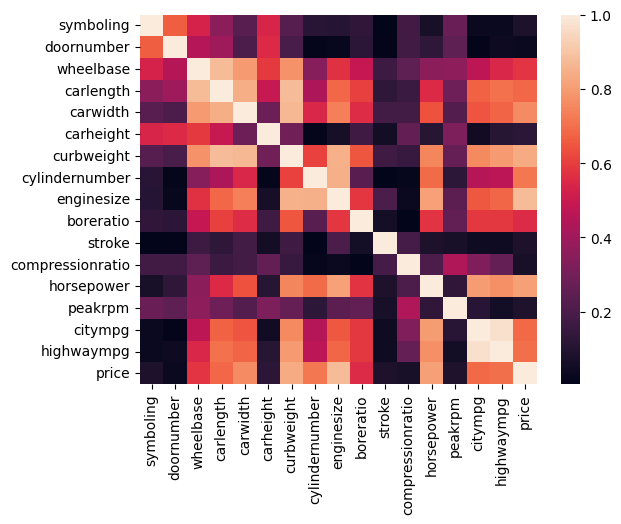

In [90]:
sns.heatmap(corr.abs())

In [91]:
corr

,symboling,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.664073,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.113129,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
doornumber,-0.664073,1.000000,0.447357,0.398568,0.207168,0.552208,0.197379,-0.016009,0.020742,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
wheelbase,-0.531954,0.447357,1.000000,0.874588,0.795144,0.589435,0.776386,0.339507,0.569329,0.488750,0.160959,0.249786,0.353295,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.398568,0.874588,1.000000,0.841118,0.491030,0.877728,0.430672,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.207168,0.795144,0.841118,1.000000,0.279210,0.867032,0.545007,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.552208,0.589435,0.491030,0.279210,1.000000,0.295572,-0.013995,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.197379,0.776386,0.877728,0.867032,0.295572,1.000000,0.609727,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
cylindernumber,-0.113129,-0.016009,0.339507,0.430672,0.545007,-0.013995,0.609727,1.000000,0.846031,0.231399,0.008209,-0.020002,0.692016,-0.124172,-0.445837,-0.466666,0.718305
enginesize,-0.105790,0.020742,0.569329,0.683360,0.735433,0.067149,0.850594,0.846031,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.119258,0.488750,0.606454,0.559150,0.171071,0.648480,0.231399,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254975,-0.584532,-0.587012,0.553173


<p>Después de investigar los términos correspondientes, se decidió eliminar las siguientes columnas:</p>

*   carlength y carwidth: Por definición, la variable curbweight representa un concepto relacionado, dado que es el peso en vacío del vehículo.
*   horsepower, boreratio y enginesize: De forma similar, las variable cylindernumber y curbweight representan conceptos relacionados.
*   highwaympg: Representa las MPG en campo abierto, mientras que citympg representa las MPG en ciudad. Si bien no son el mismo concepto, la relación lineal es más que evidente.

In [92]:
df.drop(["doornumber", "carlength", "carwidth", "horsepower", "boreratio", "enginesize","highwaympg"], axis="columns", inplace=True)

Text(0.5, 1.0, 'Correlación entre las variables numéricas')

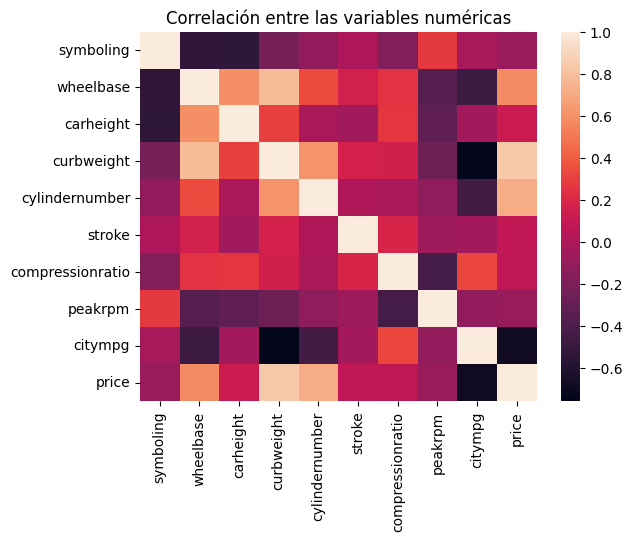

In [93]:
numeric_cols = [c for c in df.select_dtypes(include="number").columns if c not in boolean_cols]
corr = df[numeric_cols].corr()
sns.heatmap(corr)
plt.title("Correlación entre las variables numéricas")

In [94]:
corr

,symboling,wheelbase,carheight,curbweight,cylindernumber,stroke,compressionratio,peakrpm,citympg,price
symboling,1.000000,-0.531954,-0.541038,-0.227691,-0.113129,-0.008735,-0.178515,0.273606,-0.035823,-0.079978
wheelbase,-0.531954,1.000000,0.589435,0.776386,0.339507,0.160959,0.249786,-0.360469,-0.470414,0.577816
carheight,-0.541038,0.589435,1.000000,0.295572,-0.013995,-0.055307,0.261214,-0.320411,-0.048640,0.119336
curbweight,-0.227691,0.776386,0.295572,1.000000,0.609727,0.168790,0.151362,-0.266243,-0.757414,0.835305
cylindernumber,-0.113129,0.339507,-0.013995,0.609727,1.000000,0.008209,-0.020002,-0.124172,-0.445837,0.718305
stroke,-0.008735,0.160959,-0.055307,0.168790,0.008209,1.000000,0.186110,-0.067964,-0.042145,0.079443
compressionratio,-0.178515,0.249786,0.261214,0.151362,-0.020002,0.186110,1.000000,-0.435741,0.324701,0.067984
peakrpm,0.273606,-0.360469,-0.320411,-0.266243,-0.124172,-0.067964,-0.435741,1.000000,-0.113544,-0.085267
citympg,-0.035823,-0.470414,-0.048640,-0.757414,-0.445837,-0.042145,0.324701,-0.113544,1.000000,-0.685751
price,-0.079978,0.577816,0.119336,0.835305,0.718305,0.079443,0.067984,-0.085267,-0.685751,1.000000


<p>Aún existen variables con una correlación considerable con otras (curbweight, citympg, wheelbase, etc), pero por el momento no se eliminarán debido a que representan conceptos importantes a considerar, por lo que primero se examinará el desempeño en el modelo.

## Exploración de las variables

In [95]:
numeric_cols = [c for c in df.select_dtypes(include="number").columns if c not in boolean_cols and c != "price"]
numeric_cols

['symboling',
 'wheelbase',
 'carheight',
 'curbweight',
 'cylindernumber',
 'stroke',
 'compressionratio',
 'peakrpm',
 'citympg']

In [96]:
objective = "price"

### Variables numéricas

In [97]:
df[numeric_cols].describe()

,symboling,wheelbase,carheight,curbweight,cylindernumber,stroke,compressionratio,peakrpm,citympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756584,53.724876,2555.565854,4.380488,3.255414,10.142536,5125.121951,25.219512
std,1.245307,6.021776,2.443522,520.680204,1.080854,0.313597,3.972040,476.985643,6.542142
min,-2.000000,86.599998,47.799999,1488.000000,2.000000,2.070000,7.000000,4150.000000,13.000000
25%,0.000000,94.500000,52.000000,2145.000000,4.000000,3.110000,8.600000,4800.000000,19.000000
50%,1.000000,97.000000,54.099998,2414.000000,4.000000,3.290000,9.000000,5200.000000,24.000000
75%,2.000000,102.400002,55.500000,2935.000000,4.000000,3.410000,9.400000,5500.000000,30.000000
max,3.000000,120.900002,59.799999,4066.000000,12.000000,4.170000,23.000000,6600.000000,49.000000


In [98]:
df[objective].describe()

count      205.000000
mean     13276.710938
std       7988.852051
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<ipython-input-99-2332fde65380>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[objective], color="g")


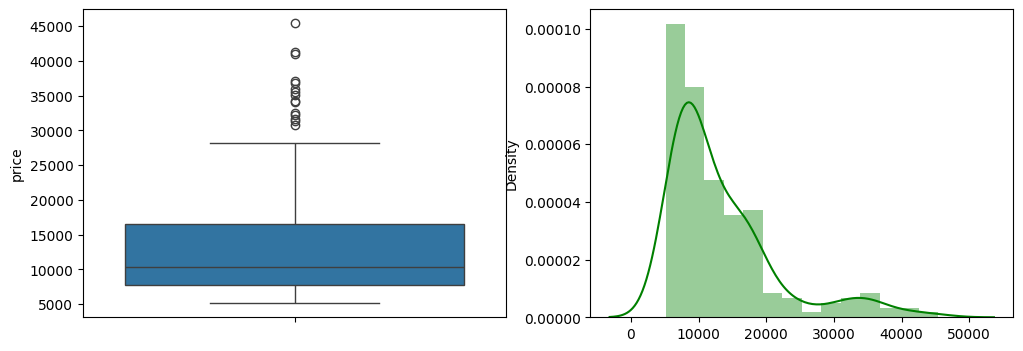

In [99]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(y=objective, data=df)
plt.subplot(1,2,2)
sns.distplot(x=df[objective], color="g")
plt.show()

In [100]:
#Usar la mediana como punto de corte para distinguir entre productos de gama alta y gama baja
median = df[objective].median()
df["gama_alta"] = (df[objective] >= median).astype(np.int16)

<Axes: xlabel='gama_alta', ylabel='price'>

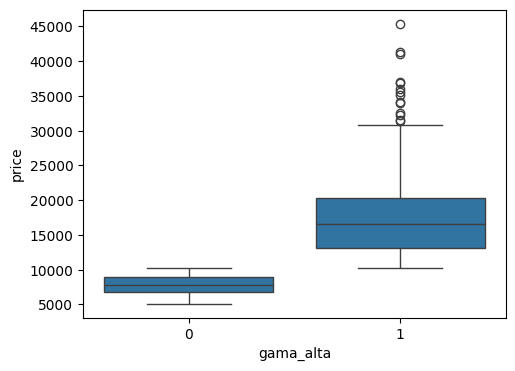

In [101]:
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(y=objective, x="gama_alta", data=df)

<ipython-input-102-c1929ad32f03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


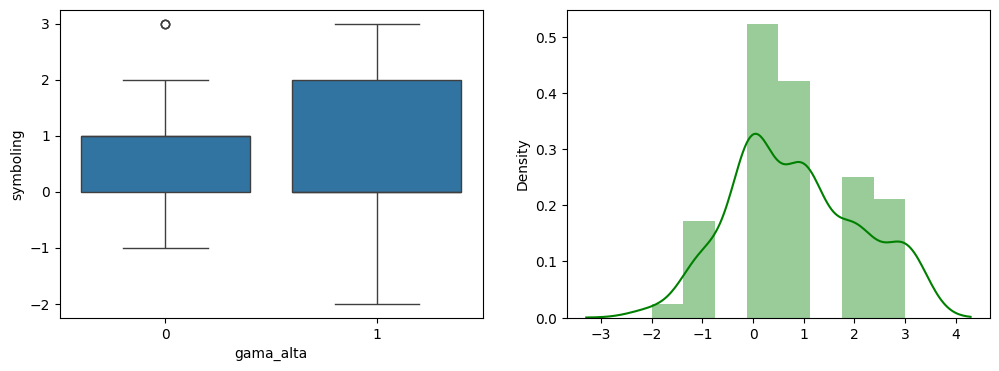

<ipython-input-102-c1929ad32f03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


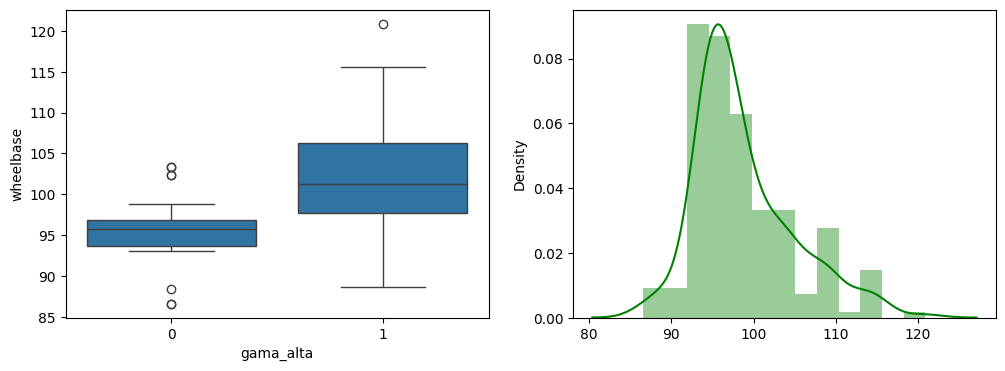

<ipython-input-102-c1929ad32f03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


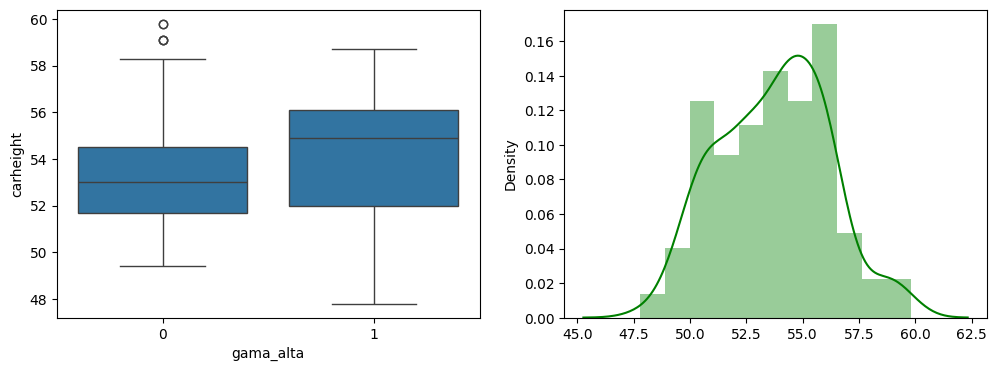

<ipython-input-102-c1929ad32f03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


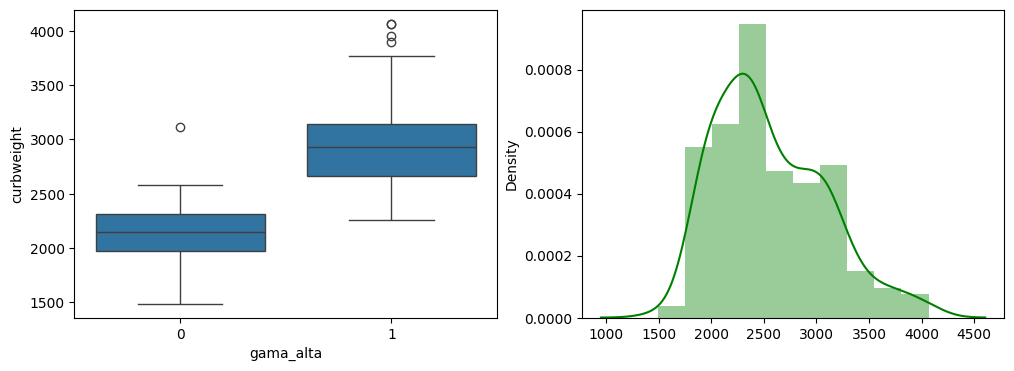

<ipython-input-102-c1929ad32f03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


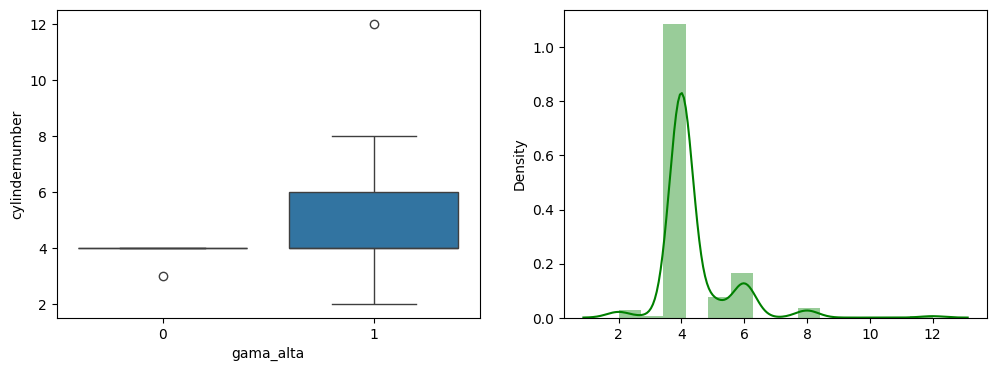

<ipython-input-102-c1929ad32f03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


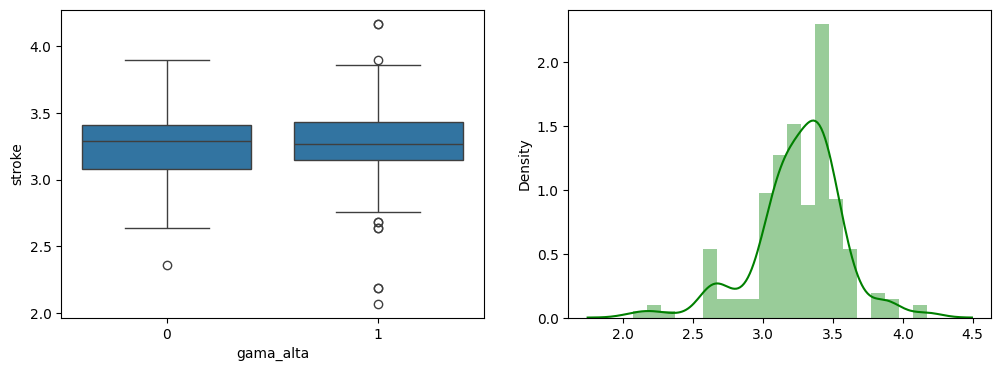

<ipython-input-102-c1929ad32f03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


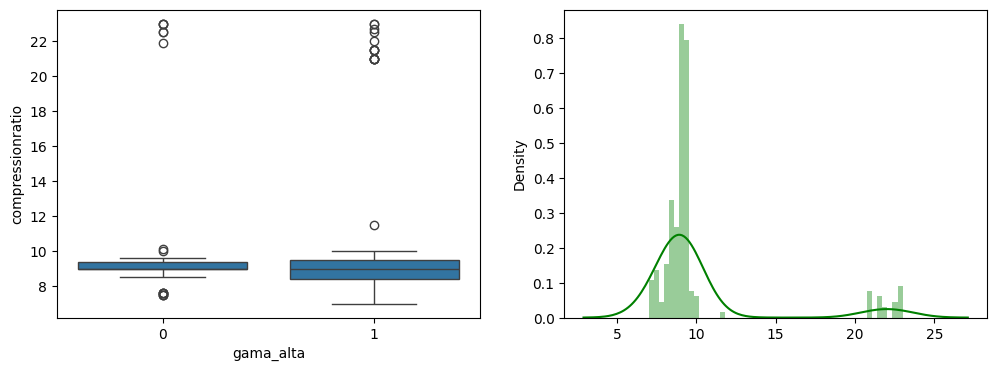

<ipython-input-102-c1929ad32f03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


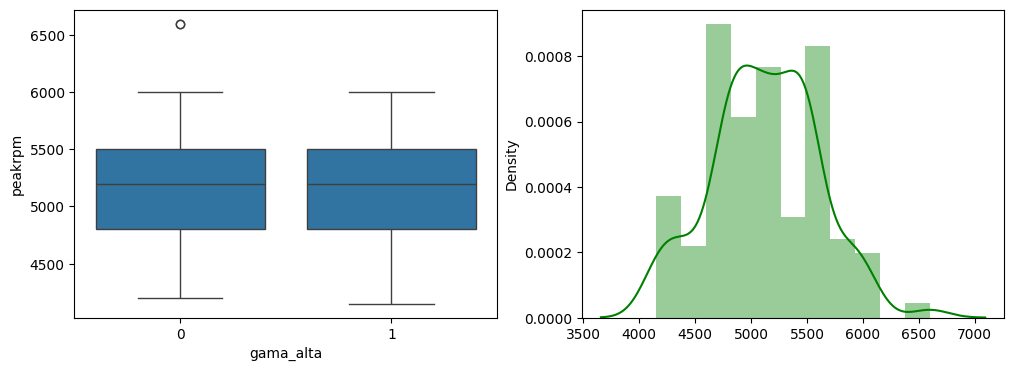

<ipython-input-102-c1929ad32f03>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df[c], color="g")


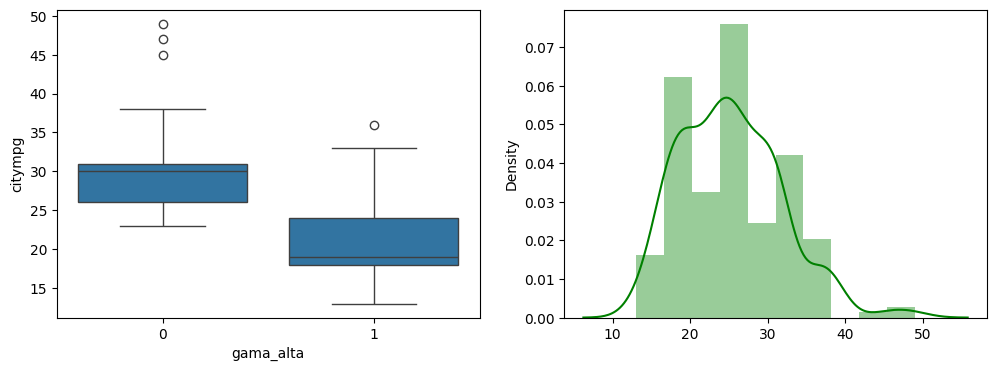

In [102]:
for c in numeric_cols:
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  sns.boxplot(y=c, x="gama_alta", data=df)
  plt.subplot(1,2,2)
  sns.distplot(x=df[c], color="g")
  plt.show()

Algunos outliers destacables son los de la categoría compressionratio. Sin embargo, estos valores son posibles, por lo que tal vez representan datos reales y no sería adecuado eliminarlos. Sin embargo, y dado que muchas otras categorías contienen outliers, se utilizará MinMaxScaler para escalar los datos.

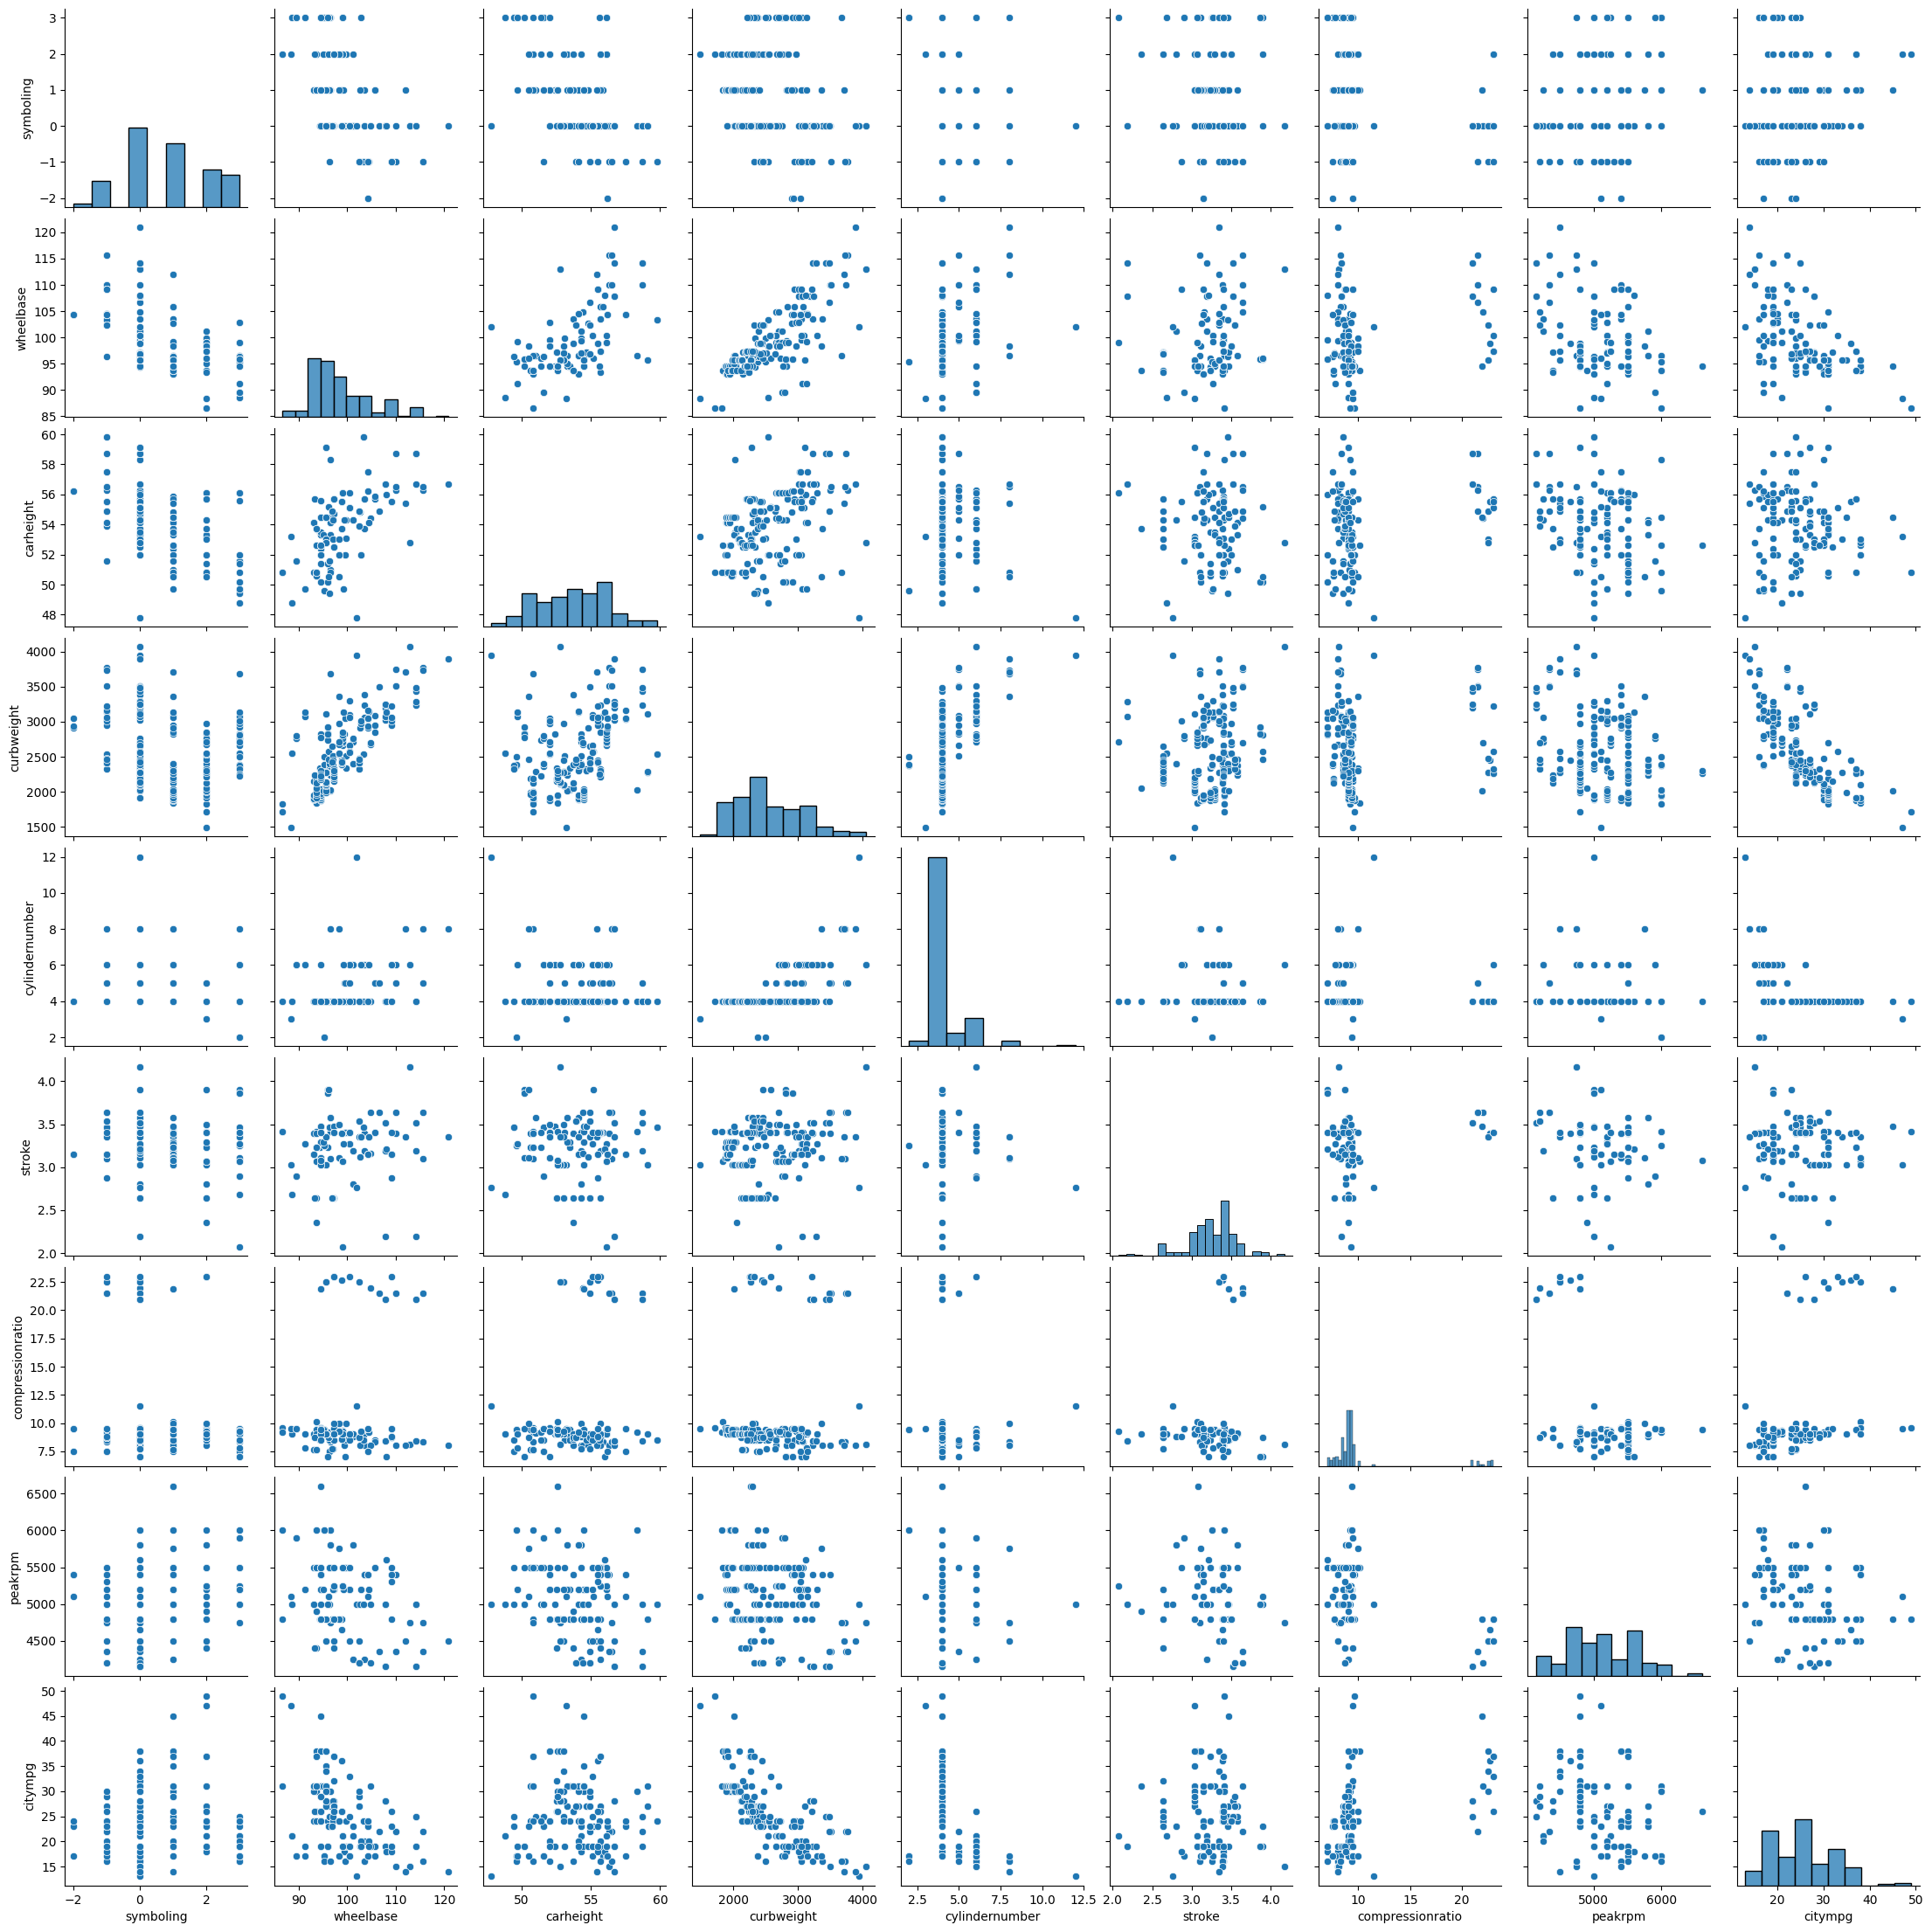

In [103]:
sns.pairplot(data=df[numeric_cols])

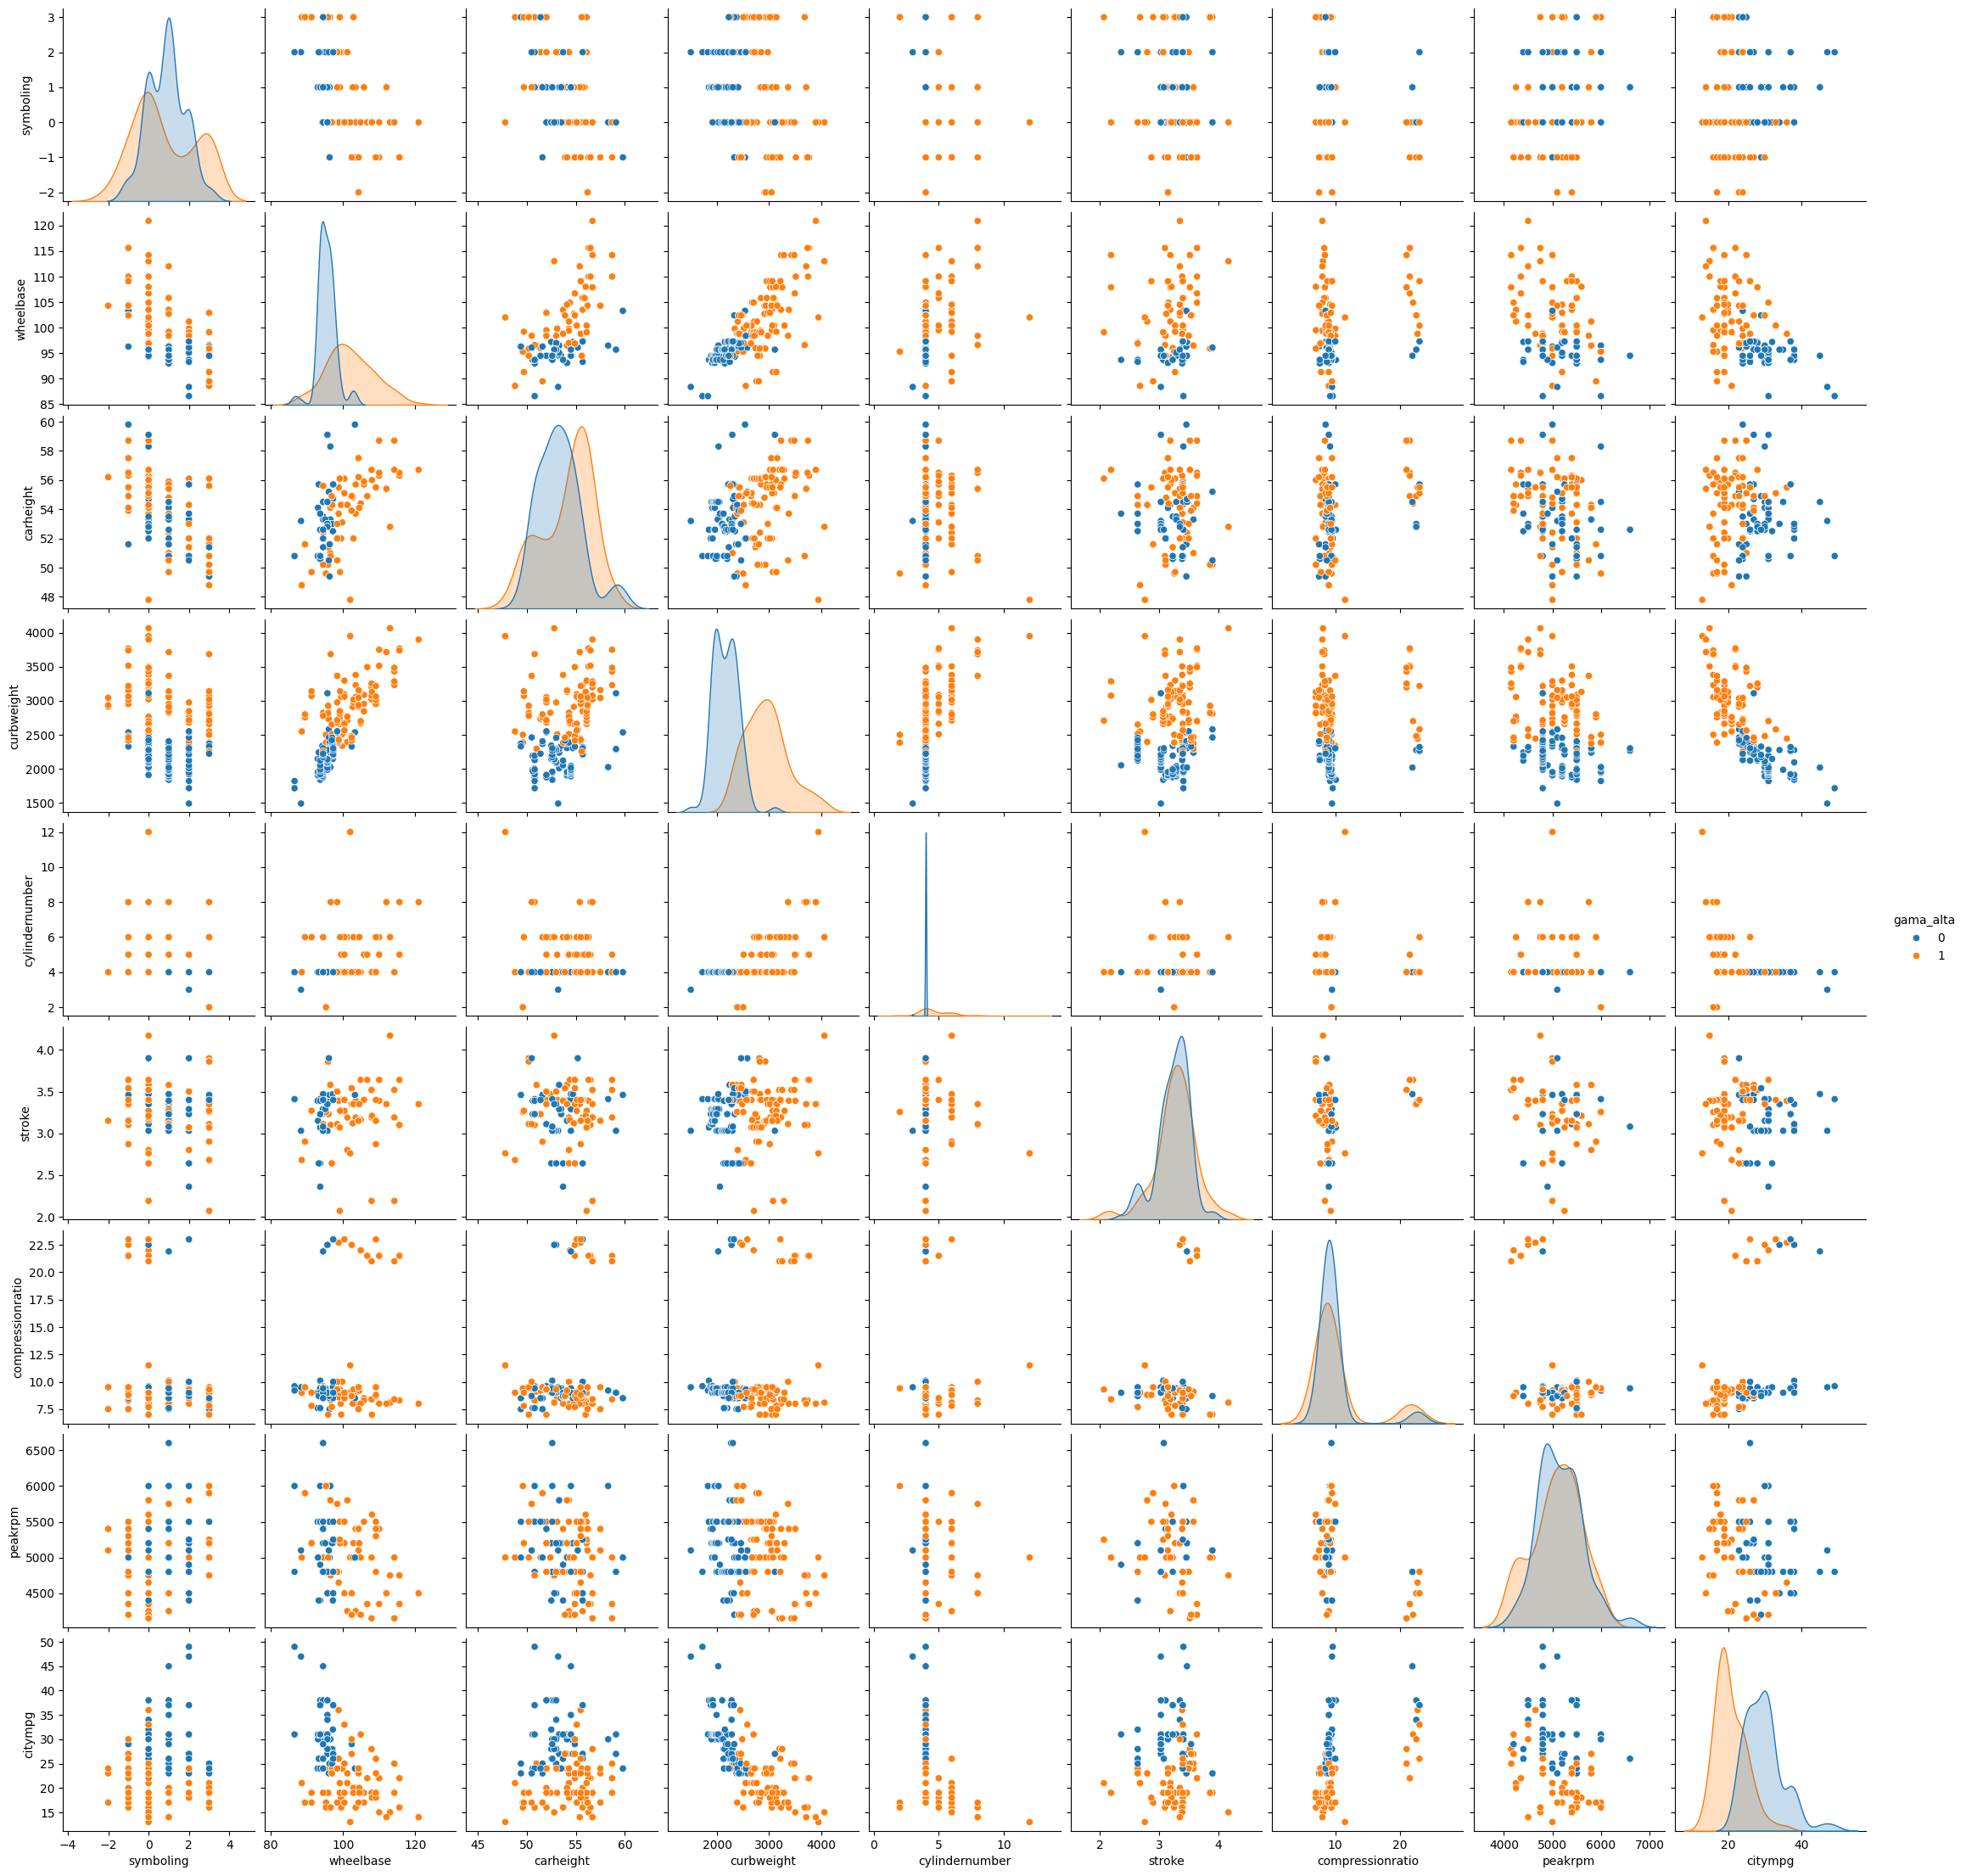

In [104]:
sns.pairplot(data=df, vars=numeric_cols, hue="gama_alta")

### Variables categóricas y booleanas

In [105]:
df.describe(include="object")

,carbody,drivewheel,enginetype,fuelsystem
count,205,205,205,205
unique,5,3,7,8
top,sedan,fwd,ohc,mpfi
freq,96,120,148,94


In [106]:
shape = df.shape[0]
shape

205

   gama_alta  fueltype_diesel  count  porcentaje
0          0                0     96    0.468293
1          1                0     89    0.434146
2          1                1     14    0.068293
3          0                1      6    0.029268


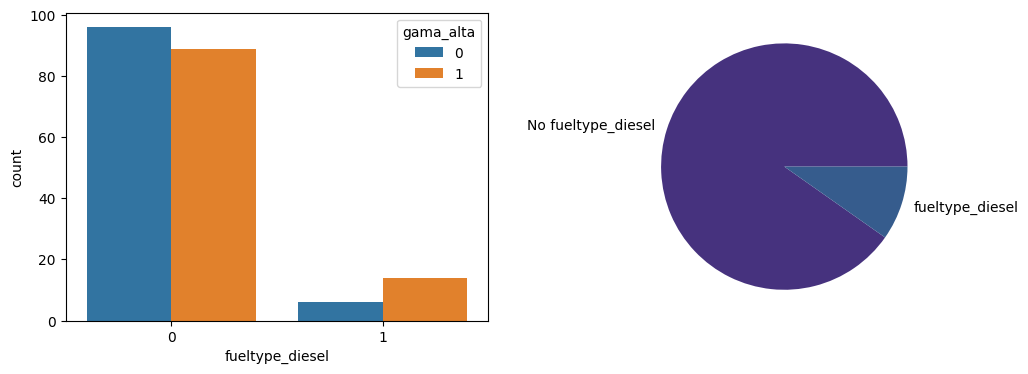

   gama_alta  aspiration_turbo  count  porcentaje
0          0                 0     95    0.463415
1          1                 0     73    0.356098
2          1                 1     30    0.146341
3          0                 1      7    0.034146


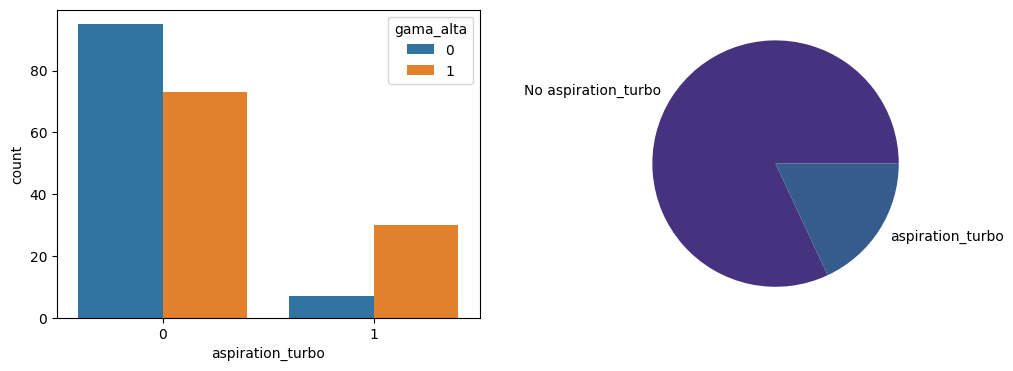

   gama_alta  enginelocation_front  count  porcentaje
0          0                     1    102    0.497561
1          1                     1    100    0.487805
2          1                     0      3    0.014634


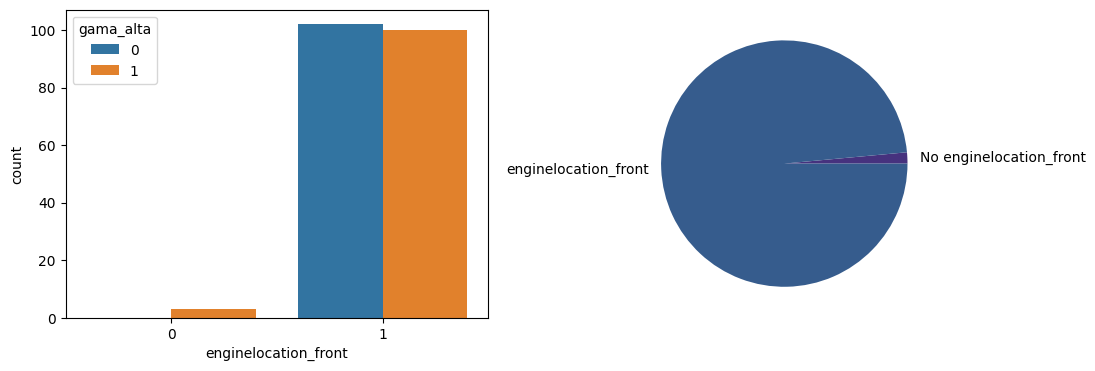

   gama_alta      carbody  count  porcentaje
0          1        sedan     52    0.253659
1          0        sedan     44    0.214634
2          0    hatchback     43    0.209756
3          1    hatchback     27    0.131707
4          1        wagon     13    0.063415
5          0        wagon     12    0.058537
6          1  convertible      6    0.029268
7          1      hardtop      5    0.024390
8          0      hardtop      3    0.014634


<Figure size 640x480 with 0 Axes>

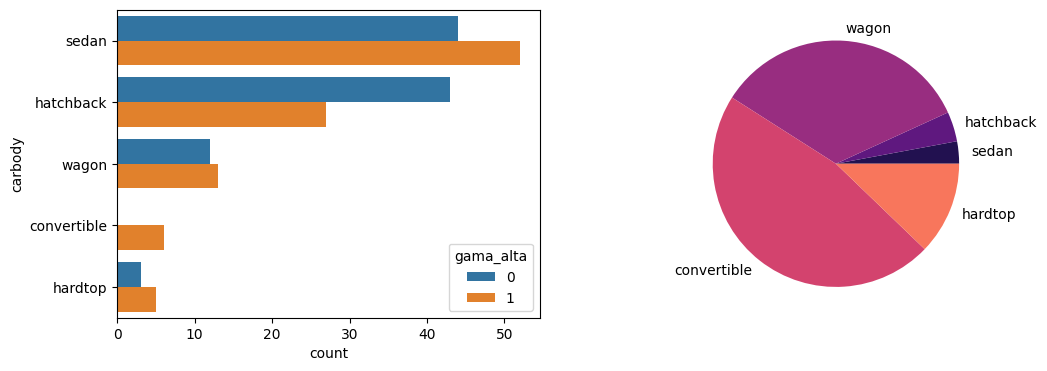

   gama_alta drivewheel  count  porcentaje
0          0        fwd     89    0.434146
1          1        rwd     68    0.331707
2          1        fwd     31    0.151220
3          0        rwd      8    0.039024
4          0        4wd      5    0.024390
5          1        4wd      4    0.019512


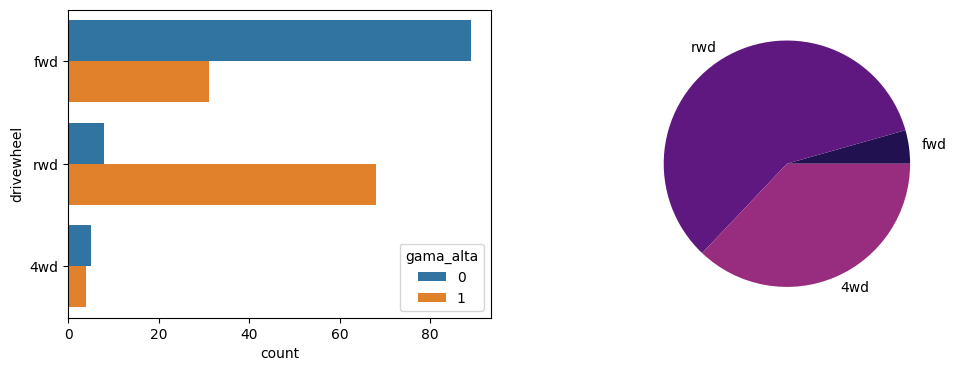

    gama_alta enginetype  count  porcentaje
0           0        ohc     89    0.434146
1           1        ohc     59    0.287805
2           1       ohcv     13    0.063415
3           1          l     11    0.053659
4           0       ohcf     10    0.048780
5           1       dohc     10    0.048780
6           1       ohcf      5    0.024390
7           1      rotor      4    0.019512
8           0       dohc      2    0.009756
9           0          l      1    0.004878
10          1      dohcv      1    0.004878


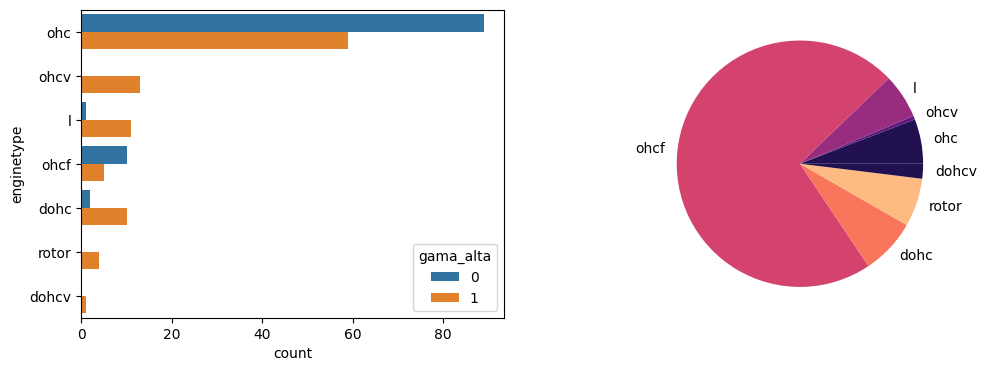

    gama_alta fuelsystem  count  porcentaje
0           1       mpfi     76    0.370732
1           0       2bbl     63    0.307317
2           0       mpfi     18    0.087805
3           1        idi     14    0.068293
4           0       1bbl     10    0.048780
5           0        idi      6    0.029268
6           0       spdi      5    0.024390
7           1       spdi      4    0.019512
8           1       2bbl      3    0.014634
9           1       4bbl      3    0.014634
10          1       1bbl      1    0.004878
11          1        mfi      1    0.004878
12          1       spfi      1    0.004878


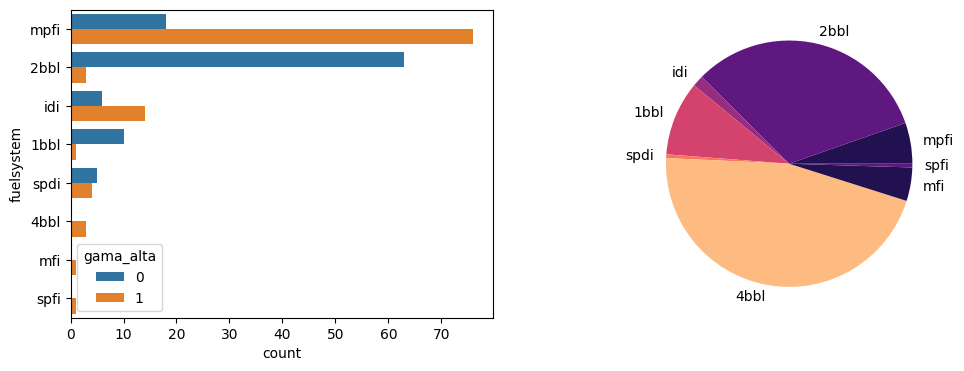

In [107]:
for c in boolean_cols:
  counts = df[["gama_alta",c]].value_counts().to_frame()
  counts.reset_index(inplace=True)
  counts["porcentaje"] = counts["count"]/shape
  print(counts)
  #Grafico de barras
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  sns.barplot(data=counts, hue="gama_alta", x=c, y="count")
  #Grafico de torta con la variable analizada
  plt.subplot(1,2,2)
  plt.pie(pd.DataFrame(counts.groupby(c).sum()).porcentaje, labels=[f"No {c}", c], colors=sns.color_palette("viridis"))
  plt.show()

colormap = plt.get_cmap("cool")
plt.set_cmap(colormap)
for c in list(df.select_dtypes(include="object").columns):
  counts = df[["gama_alta",c]].value_counts().to_frame()
  counts.reset_index(inplace=True)
  counts["porcentaje"] = counts["count"]/shape
  print(counts)
  #Grafico de barras
  plt.figure(figsize=(12,4))
  plt.subplot(1,2,1)
  sns.barplot(data=counts, hue="gama_alta", y=c, x="count")
  if c == "patron_resistencia": continue
  #Grafico de torta con la variable analizada
  plt.subplot(1,2,2)
  plt.pie(pd.DataFrame(counts.groupby(c).sum()).porcentaje, labels=counts[c].unique(), colors=sns.color_palette("magma"))
  plt.show()

<Axes: xlabel='price', ylabel='Count'>

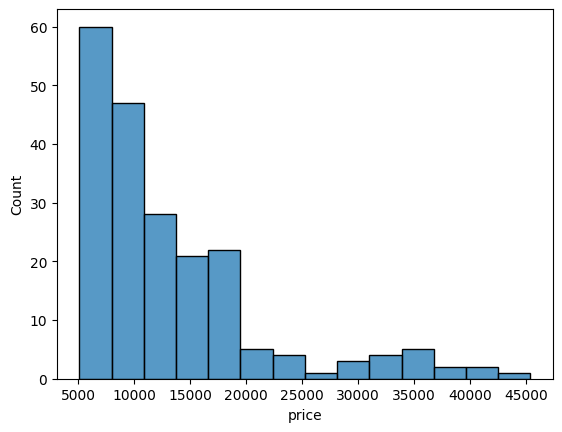

In [108]:
sns.histplot(df.price)

### Selección de columnas para el modelo

A continuación se muestran las columnas que, según las gráficas anteriores, parecen más relevantes para la separación de clases (teniendo en cuenta que se entrenará un modelo de regresión)

In [109]:
numeric_cols = [c for c in df.select_dtypes(include="number").columns if c not in boolean_cols]
cat_cols = ["enginelocation_front", "drivewheel", "carbody", "enginetype", "fuelsystem"]
selected_cols = numeric_cols
selected_cols.extend(cat_cols)
selected_cols

['symboling',
 'wheelbase',
 'carheight',
 'curbweight',
 'cylindernumber',
 'stroke',
 'compressionratio',
 'peakrpm',
 'citympg',
 'price',
 'gama_alta',
 'enginelocation_front',
 'drivewheel',
 'carbody',
 'enginetype',
 'fuelsystem']

In [110]:
df[selected_cols]

,symboling,wheelbase,carheight,curbweight,cylindernumber,stroke,compressionratio,peakrpm,citympg,price,gama_alta,enginelocation_front,drivewheel,carbody,enginetype,fuelsystem
0,3,88.599998,48.799999,2548,4,2.68,9.0,5000,21,13495.0,1,1,rwd,convertible,dohc,mpfi
1,3,88.599998,48.799999,2548,4,2.68,9.0,5000,21,16500.0,1,1,rwd,convertible,dohc,mpfi
2,1,94.500000,52.400002,2823,6,3.47,9.0,5000,19,16500.0,1,1,rwd,hatchback,ohcv,mpfi
3,2,99.800003,54.299999,2337,4,3.40,10.0,5500,24,13950.0,1,1,fwd,sedan,ohc,mpfi
4,2,99.400002,54.299999,2824,5,3.40,8.0,5500,18,17450.0,1,1,4wd,sedan,ohc,mpfi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.099998,55.500000,2952,4,3.15,9.5,5400,23,16845.0,1,1,rwd,sedan,ohc,mpfi
201,-1,109.099998,55.500000,3049,4,3.15,8.7,5300,19,19045.0,1,1,rwd,sedan,ohc,mpfi
202,-1,109.099998,55.500000,3012,6,2.87,8.8,5500,18,21485.0,1,1,rwd,sedan,ohcv,mpfi
203,-1,109.099998,55.500000,3217,6,3.40,23.0,4800,26,22470.0,1,1,rwd,sedan,ohc,idi


# 2. Preparación de los Datos

## Normalización de variables numéricas

<p>Como se muestra a continuación, las variables numéricas tienen escalas de valores bastante diferentes, por tanto se considera aplicar el MinMaxScaler, para manejar outliers.

In [111]:
df[numeric_cols].describe()

,symboling,wheelbase,carheight,curbweight,cylindernumber,stroke,compressionratio,peakrpm,citympg,price,gama_alta,enginelocation_front
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756584,53.724876,2555.565854,4.380488,3.255414,10.142536,5125.121951,25.219512,13276.710938,0.502439,0.985366
std,1.245307,6.021776,2.443522,520.680204,1.080854,0.313597,3.972040,476.985643,6.542142,7988.852051,0.501218,0.120377
min,-2.000000,86.599998,47.799999,1488.000000,2.000000,2.070000,7.000000,4150.000000,13.000000,5118.000000,0.000000,0.000000
25%,0.000000,94.500000,52.000000,2145.000000,4.000000,3.110000,8.600000,4800.000000,19.000000,7788.000000,0.000000,1.000000
50%,1.000000,97.000000,54.099998,2414.000000,4.000000,3.290000,9.000000,5200.000000,24.000000,10295.000000,1.000000,1.000000
75%,2.000000,102.400002,55.500000,2935.000000,4.000000,3.410000,9.400000,5500.000000,30.000000,16503.000000,1.000000,1.000000
max,3.000000,120.900002,59.799999,4066.000000,12.000000,4.170000,23.000000,6600.000000,49.000000,45400.000000,1.000000,1.000000


## Selección y codificación de columnas

**Selección de variables**
<p>Se considera utilizar SelectKBest para evaluar la mejor combinación de parámetros. Dado que el dataset contiene variables tanto categóricas como numéricas, se va a utilizar mutual_info_reg para la selección de características.</p>

**Codificación de variables**
<p>En cuanto a las variables categóricas, se utilizará codificación OneHot. Siguiendo las prácticas recomendadas, se hace la codificación antes del escalado y la selección de variables.

In [112]:
for c in cat_cols:
  print(f"Valores de {c}: ", df[c].unique())

Valores de enginelocation_front:  [1 0]
Valores de drivewheel:  ['rwd' 'fwd' '4wd']
Valores de carbody:  ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
Valores de enginetype:  ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
Valores de fuelsystem:  ['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [113]:
cat_cols.remove("enginelocation_front")
dummies = pd.get_dummies(df[cat_cols])
dummies

,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,False,False,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,True,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,True,False,False,True,False,False,False,False,...,True,False,False,False,False,False,False,True,False,False
3,False,True,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
201,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
202,False,False,True,False,False,False,True,False,False,False,...,True,False,False,False,False,False,False,True,False,False
203,False,False,True,False,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [114]:
dummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   drivewheel_4wd       205 non-null    bool 
 1   drivewheel_fwd       205 non-null    bool 
 2   drivewheel_rwd       205 non-null    bool 
 3   carbody_convertible  205 non-null    bool 
 4   carbody_hardtop      205 non-null    bool 
 5   carbody_hatchback    205 non-null    bool 
 6   carbody_sedan        205 non-null    bool 
 7   carbody_wagon        205 non-null    bool 
 8   enginetype_dohc      205 non-null    bool 
 9   enginetype_dohcv     205 non-null    bool 
 10  enginetype_l         205 non-null    bool 
 11  enginetype_ohc       205 non-null    bool 
 12  enginetype_ohcf      205 non-null    bool 
 13  enginetype_ohcv      205 non-null    bool 
 14  enginetype_rotor     205 non-null    bool 
 15  fuelsystem_1bbl      205 non-null    bool 
 16  fuelsystem_2bbl      205 n

In [115]:
df = pd.concat([df, dummies], axis = 1)
df.drop(columns=cat_cols, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   symboling             205 non-null    int16  
 1   fueltype_diesel       205 non-null    int16  
 2   aspiration_turbo      205 non-null    int16  
 3   enginelocation_front  205 non-null    int16  
 4   wheelbase             205 non-null    float32
 5   carheight             205 non-null    float32
 6   curbweight            205 non-null    int16  
 7   cylindernumber        205 non-null    int16  
 8   stroke                205 non-null    float32
 9   compressionratio      205 non-null    float32
 10  peakrpm               205 non-null    int16  
 11  citympg               205 non-null    int16  
 12  price                 205 non-null    float32
 13  gama_alta             205 non-null    int16  
 14  drivewheel_4wd        205 non-null    bool   
 15  drivewheel_fwd        2

## Guardar dataframe con los datos procesados

In [116]:
df.to_csv("Carros.csv")

# 3. Entrenamiento del modelo

## Modelos a probar

**Modelos a probar para regresión**
<p>Los siguientes modelos se probarán utilizando una grid search:

*   Regresión Lineal Simple
*   Regresión Lineal Múltiple
*   Árbol de Decisión
*   Máquina de Vectores de Soporte
*   Regresión Ridge
*   Regresión Lasso
*   Regresión Red Elástica

In [117]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

model_params_reg = {
    #Entrenar modelo de regresión lineal
    "Regresión Lineal":{"model":LinearRegression(),"params":{}},
    #Entrenar modelo de regresión polinómica con grados de 2 a 5 y bias True y False
    "Regresión Polinómica":{"model":make_pipeline(PolynomialFeatures(), LinearRegression()), "params":{
        "polynomialfeatures__degree":range(2,6),
        "polynomialfeatures__include_bias":[True, False]
    }},
    #Entrenar modelo Ridge con alpha 0.1,0.5,1,2,5,10,50,100
    "Ridge":{"model":Ridge(), "params":{
        "alpha":[0.1,0.5,1,2,5,10,50,100],
        "random_state":[42]
    }},
    #Entrenar modelo Lasso con alpha 0.1,0.5,1,2,5,10,50,100
    "Lasso":{"model":Lasso(), "params":{
        "alpha":[0.1,0.5,1,2,5,10,50,100],
        "random_state":[42]
    }},
    #Entrenar modelo Red Elástica con alpha 0.1,0.5,1,2,5,10,50,100
    "Red Elástica":{"model":ElasticNet(), "params":{
        "alpha":[0.1,0.5,1,2,5,10,50,100],
        "l1_ratio":np.linspace(0.1,1.0,num=10),
        "random_state":[42]
    }},
    #Probar modelos de árbol de decisión con profundidades del 1 al 10
    "Árbol de Decisión":{"model":DecisionTreeRegressor(), "params":{
        "max_depth":range(2,11),
        "random_state":[42]
    }},
    #Provar SVM con kernels linear, poly, rbf y sigmoide; valor C de 0.01, 0.1, 0.5, 1 y 10 y gamma de 0.01, 0.5, 1 y 10
    "SVM (SVR)":{"model":SVR(), "params":{
        "kernel":["linear","poly","rbf","sigmoid"],
        "C":[0.01,0.1,0.5,1,10],
        "gamma":[0.01,0.5,1,10]
    }}
}

**Modelos a probar para clasificación**

In [118]:
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

model_params_clf = {
    #Probar modelos de regresión logística con penalidades L1, L2, Red Elástica o ninguna
    "Regresión Logística":{"model":LogisticRegression(), "params":{
        "penalty":["l1","l2"],
        "solver":["liblinear"],
        "random_state":[42]
    }},
    #Probar modelos de perceptrón simple con penalidades L1, L2, Red Elástica o ninguna
    "Perceptrón":{"model":Perceptron(), "params":{
        "penalty":["l1","l2","elasticnet",None],
        "random_state":[42]
    }},
    #Probar modelos de árbol de decisión con profundidades del 1 al 10
    "Árbol de Decisión":{"model":DecisionTreeClassifier(), "params":{
        "max_depth":range(2,11),
        "random_state":[42]
    }},
    #Probar modelos de bosques con profundidades del 1 al 10 y número de estimadores del 10 al 100 con salto de 10
    "Random Forest":{"model":RandomForestClassifier(), "params":{
        "max_depth":range(2,11),
        "n_estimators":range(10, 101, 10),
        "random_state":[42]
    }},
    #Provar SVM con kernels linear, poly, rbf y sigmoide; valor C de 0.01, 0.1, 0.5, 1 y 10 y gamma de 0.01, 0.5, 1 y 10
    "SVM (SVC)":{"model":SVC(), "params":{
        "kernel":["linear","poly","rbf","sigmoid"],
        "C":[0.01,0.1,0.5,1,10],
        "gamma":[0.01,0.5,1,10],
        "random_state":[42]
    }},
    #Probar KNN con número de vecinos de 1 a 15
    "K-Nearest Neighbors":{"model":KNeighborsClassifier(), "params":{
        "n_neighbors":range(3,16)
    }},
    "Gaussian Naive Bayes":{"model":GaussianNB(), "params":{}}
}

## División entre conjunto de entrenamiento y de prueba

In [119]:
from sklearn.model_selection import train_test_split

objective_reg = "price"
objective_clf = "gama_alta"

X = df.drop([objective_reg, objective_clf], axis="columns")
y_reg = df[objective_reg]
y_clf = df[objective_clf]

#Modelo de regresión
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

print("X_train shape: ", X_train_reg.shape)
print("y_train shape: ", y_train_reg.shape)
print("X_test shape:", X_test_reg.shape)
print("y_test shape:", y_test_reg.shape)

#Modelo de clasificación
#En este caso, se utilizará stratify=y para asegurar que las distintas categorías estén distribuidas entre los conjuntos train y test
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

print("X_train shape: ", X_train_clf.shape)
print("y_train shape: ", y_train_clf.shape)
print("X_test shape:", X_test_clf.shape)
print("y_test shape:", y_test_clf.shape)

X_train shape:  (164, 35)
y_train shape:  (164,)
X_test shape: (41, 35)
y_test shape: (41,)
X_train shape:  (164, 35)
y_train shape:  (164,)
X_test shape: (41, 35)
y_test shape: (41,)


In [120]:
#Baseline del modelo de regresión
baseline = y_train_reg.mean()
print("Media del modelo:", baseline)

Media del modelo: 13223.415


In [121]:
#Precisión base del modelo de clasificación
acc_baseline = y_train_clf.value_counts(normalize=True).max()
print("Baseline Accuracy:", acc_baseline)

Baseline Accuracy: 0.5


## Escalado con MinMaxScaler

In [122]:
from sklearn.preprocessing import MinMaxScaler

#Escalado para regresión
scaler = MinMaxScaler().fit(X_train_reg)
X_train_reg_esc = scaler.transform(X_train_reg)
X_test_reg_esc = scaler.transform(X_test_reg)

#Escalado para clasificación
scaler = MinMaxScaler().fit(X_train_clf)
X_train_clf_esc = scaler.transform(X_train_clf)
X_test_clf_esc = scaler.transform(X_test_clf)

## Pipeline con Reducción de dimensiones y el modelo dentro de un Grid Search

<p>Por simpleza, se utilizará cv = 5, score="r2" para regresión y score="f1" en el grid para clasificación, es decir, se buscará optimizar la métrica R2 (regresión) y la métrica F1 (clasificación) con 5 folds para la validación cruzada. Se utilizará reducción de dimensiones debido a que aún hay correlaciones comparablemente altas en la matriz de correlación.

### Modelos de regresión

In [123]:
#Modelos de regresión
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

mejores_modelos_reg = {}

for k in [2, 3, 4, 5]:
  pca = PCA(n_components=k).fit(X_train_reg_esc)
  X_train_reg_dec = pca.transform(X_train_reg_esc)
  X_test_reg_dec = pca.transform(X_test_reg_esc)
  for i, j in model_params_reg.items():
    print(f"Modelo: {i}; columnas: {k}")
    grid = GridSearchCV(j["model"], param_grid=j["params"], scoring="r2", cv=5).fit(X_train_reg_dec, y_train_reg)
    print(f"Modelo: {i}, número de variables seleccionadas: {k}")
    results = pd.DataFrame(grid.cv_results_)
    print(results)
    print(f"Mejores parámetros: {grid.best_params_}")
    print(f"Mejor puntaje: {grid.best_score_}")
    score = grid.score(X_test_reg_dec, y_test_reg)
    print(f"Puntaje test: {score}")
    mejores_modelos_reg[(i, k)] = [grid, grid.best_params_, grid.best_score_, score]

Modelo: Regresión Lineal; columnas: 2
Modelo: Regresión Lineal, número de variables seleccionadas: 2
   mean_fit_time  std_fit_time  mean_score_time  std_score_time params  \
0       0.001463      0.000272         0.000506         0.00003     {}   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.575987           0.569865           0.312225           0.483243   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.573099         0.502884        0.101486                1  
Mejores parámetros: {}
Mejor puntaje: 0.5028838131866025
Puntaje test: 0.5182886094200947
Modelo: Regresión Polinómica; columnas: 2
Modelo: Regresión Polinómica, número de variables seleccionadas: 2
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002369      0.000729         0.000735        0.000040   
1       0.002460      0.000604         0.000805        0.000166   
2       0.002022      0.000285         0.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.434e+07, tolerance: 8.320e+05
  model = cd_fast.enet_coordinate_descent(


Modelo: Red Elástica, número de variables seleccionadas: 2
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.001724      0.000216         0.000647        0.000044         0.1   
1        0.001571      0.000335         0.000611        0.000059         0.1   
2        0.001269      0.000016         0.000637        0.000074         0.1   
3        0.001216      0.000046         0.000556        0.000017         0.1   
4        0.001196      0.000022         0.000533        0.000025         0.1   
..            ...           ...              ...             ...         ...   
75       0.001137      0.000021         0.000490        0.000025         100   
76       0.001290      0.000154         0.000564        0.000156         100   
77       0.001356      0.000291         0.000561        0.000113         100   
78       0.001121      0.000030         0.000484        0.000018         100   
79       0.001096      0.000015         0.000488        0.000

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.940e+06, tolerance: 8.320e+05
  model = cd_fast.enet_coordinate_descent(


Modelo: Red Elástica, número de variables seleccionadas: 3
    mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0        0.002199      0.000854         0.000685        0.000054         0.1   
1        0.001249      0.000098         0.000569        0.000028         0.1   
2        0.001157      0.000028         0.000578        0.000032         0.1   
3        0.001239      0.000164         0.000592        0.000073         0.1   
4        0.001130      0.000002         0.000598        0.000047         0.1   
..            ...           ...              ...             ...         ...   
75       0.001119      0.000012         0.000496        0.000029         100   
76       0.001150      0.000030         0.000486        0.000020         100   
77       0.001140      0.000017         0.000528        0.000023         100   
78       0.001185      0.000014         0.000539        0.000043         100   
79       0.001267      0.000138         0.000563        0.000

In [124]:
df_results_reg = pd.DataFrame(mejores_modelos_reg.values(), index=mejores_modelos_reg.keys(), columns=["Modelo", "Parametros", "R2_Train", "R2_Test"])
df_results_reg.reset_index(inplace=True)
df_results_reg.rename({"level_0":"Tipo_Modelo", "level_1":"Num_Variables"}, axis="columns", inplace=True)
df_results_reg

,Tipo_Modelo,Num_Variables,Modelo,Parametros,R2_Train,R2_Test
0,Regresión Lineal,2,"GridSearchCV(cv=5, estimator=LinearRegression(...",{},0.502884,0.518289
1,Regresión Polinómica,2,"GridSearchCV(cv=5,\n estimator=Pip...","{'polynomialfeatures__degree': 5, 'polynomialf...",0.539603,0.643323
2,Ridge,2,"GridSearchCV(cv=5, estimator=Ridge(),\n ...","{'alpha': 5, 'random_state': 42}",0.504717,0.511806
3,Lasso,2,"GridSearchCV(cv=5, estimator=Lasso(),\n ...","{'alpha': 100, 'random_state': 42}",0.505538,0.512718
4,Red Elástica,2,"GridSearchCV(cv=5, estimator=ElasticNet(),\n ...","{'alpha': 100, 'l1_ratio': 1.0, 'random_state'...",0.505538,0.512718
5,Árbol de Decisión,2,"GridSearchCV(cv=5, estimator=DecisionTreeRegre...","{'max_depth': 8, 'random_state': 42}",0.502218,0.824069
6,SVM (SVR),2,"GridSearchCV(cv=5, estimator=SVR(),\n ...","{'C': 10, 'gamma': 10, 'kernel': 'poly'}",0.414150,0.296601
7,Regresión Lineal,3,"GridSearchCV(cv=5, estimator=LinearRegression(...",{},0.497618,0.500010
8,Regresión Polinómica,3,"GridSearchCV(cv=5,\n estimator=Pip...","{'polynomialfeatures__degree': 3, 'polynomialf...",0.540905,0.421205
9,Ridge,3,"GridSearchCV(cv=5, estimator=Ridge(),\n ...","{'alpha': 10, 'random_state': 42}",0.502002,0.491220


### Modelos de clasificación

In [125]:
#Modelos de clasificación
mejores_modelos_clf = {}

for k in [2, 3, 4, 5]:
  pca = PCA(n_components=k).fit(X_train_clf_esc)
  X_train_clf_dec = pca.transform(X_train_clf_esc)
  X_test_clf_dec = pca.transform(X_test_clf_esc)
  for i, j in model_params_clf.items():
    print(f"Modelo: {i}; columnas: {k}")
    grid = GridSearchCV(j["model"], param_grid=j["params"], scoring="f1", cv=5).fit(X_train_clf_dec, y_train_clf)
    print(f"Modelo: {i}, número de variables seleccionadas: {k}")
    results = pd.DataFrame(grid.cv_results_)
    print(results)
    print(f"Mejores parámetros: {grid.best_params_}")
    print(f"Mejor puntaje: {grid.best_score_}")
    score = grid.score(X_test_clf_dec, y_test_clf)
    print(f"Puntaje test: {score}")
    mejores_modelos_clf[(i, k)] = [grid, grid.best_params_, grid.best_score_, score]

Modelo: Regresión Logística; columnas: 2
Modelo: Regresión Logística, número de variables seleccionadas: 2
   mean_fit_time  std_fit_time  mean_score_time  std_score_time param_penalty  \
0       0.001678      0.000398         0.002181        0.000662            l1   
1       0.001519      0.000135         0.001791        0.000011            l2   

  param_random_state param_solver  \
0                 42    liblinear   
1                 42    liblinear   

                                              params  split0_test_score  \
0  {'penalty': 'l1', 'random_state': 42, 'solver'...           0.857143   
1  {'penalty': 'l2', 'random_state': 42, 'solver'...           0.857143   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0            0.83871           0.800000           0.903226                0.8   
1            0.83871           0.774194           0.903226                0.8   

   mean_test_score  std_test_score  rank_test_score  
0         0.8

In [126]:
df_results_clf = pd.DataFrame(mejores_modelos_clf.values(), index=mejores_modelos_clf.keys(), columns=["Modelo", "Parametros", "R2_Train", "R2_Test"])
df_results_clf.reset_index(inplace=True)
df_results_clf.rename({"level_0":"Tipo_Modelo", "level_1":"Num_Variables"}, axis="columns", inplace=True)
df_results_clf

,Tipo_Modelo,Num_Variables,Modelo,Parametros,R2_Train,R2_Test
0,Regresión Logística,2,"GridSearchCV(cv=5, estimator=LogisticRegressio...","{'penalty': 'l1', 'random_state': 42, 'solver'...",0.839816,0.878049
1,Perceptrón,2,"GridSearchCV(cv=5, estimator=Perceptron(),\n ...","{'penalty': None, 'random_state': 42}",0.846482,0.850000
2,Árbol de Decisión,2,"GridSearchCV(cv=5, estimator=DecisionTreeClass...","{'max_depth': 2, 'random_state': 42}",0.835105,0.844444
3,Random Forest,2,"GridSearchCV(cv=5, estimator=RandomForestClass...","{'max_depth': 9, 'n_estimators': 20, 'random_s...",0.868969,0.791667
4,SVM (SVC),2,"GridSearchCV(cv=5, estimator=SVC(),\n ...","{'C': 0.1, 'gamma': 10, 'kernel': 'sigmoid', '...",0.853678,0.750000
5,K-Nearest Neighbors,2,"GridSearchCV(cv=5, estimator=KNeighborsClassif...",{'n_neighbors': 3},0.825242,0.755556
6,Gaussian Naive Bayes,2,"GridSearchCV(cv=5, estimator=GaussianNB(), par...",{},0.838205,0.820513
7,Regresión Logística,3,"GridSearchCV(cv=5, estimator=LogisticRegressio...","{'penalty': 'l2', 'random_state': 42, 'solver'...",0.830099,0.820513
8,Perceptrón,3,"GridSearchCV(cv=5, estimator=Perceptron(),\n ...","{'penalty': 'l2', 'random_state': 42}",0.816850,0.580645
9,Árbol de Decisión,3,"GridSearchCV(cv=5, estimator=DecisionTreeClass...","{'max_depth': 3, 'random_state': 42}",0.829835,0.829268


## Resultados de los modelos

### Modelos de regresión

<Figure size 1200x800 with 0 Axes>

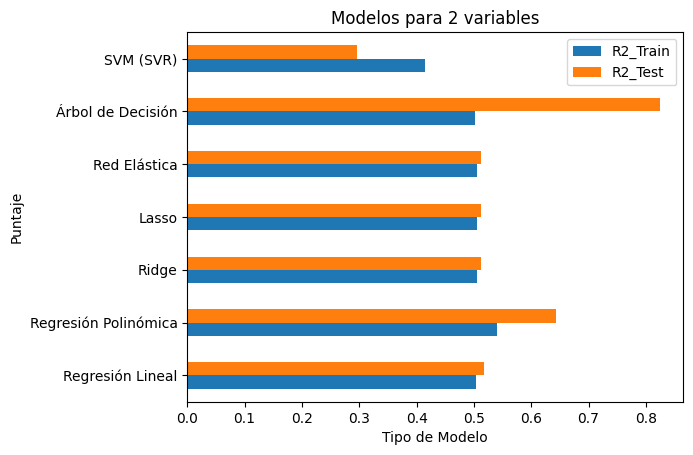

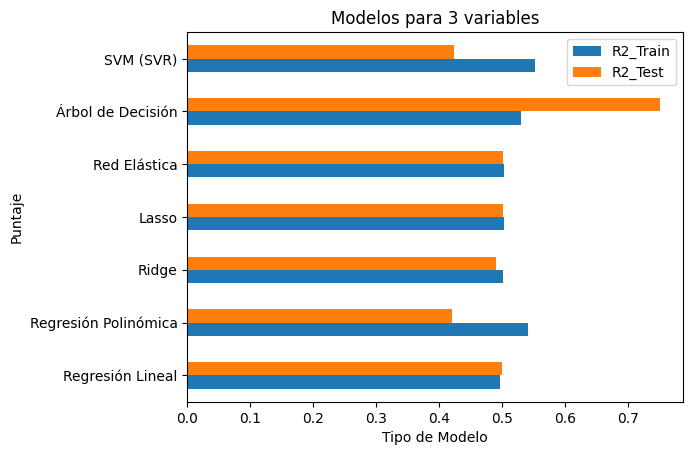

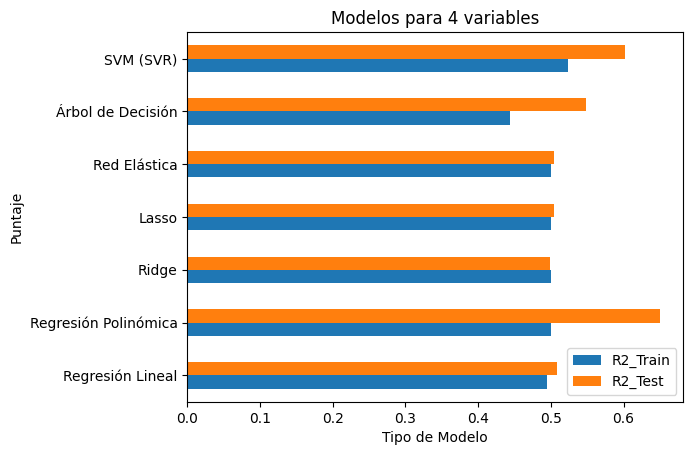

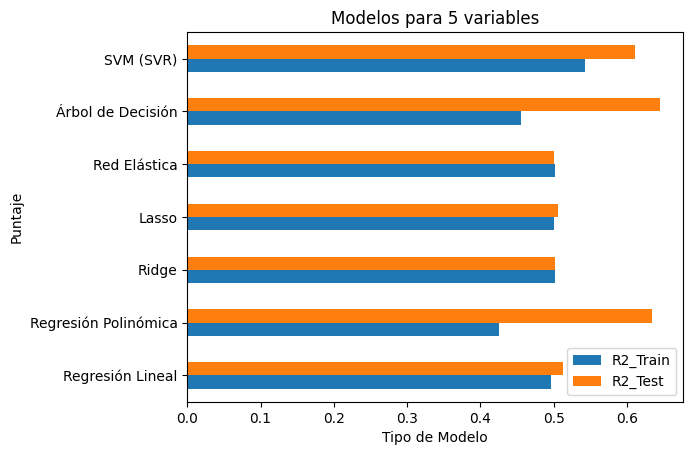

In [127]:
#Comparando modelos de regresión
plt.figure(figsize=(12,8))
for num in df_results_reg.Num_Variables.unique():
  df_plot = df_results_reg[df_results_reg.Num_Variables == num].loc[:,["Tipo_Modelo", "R2_Train", "R2_Test"]]
  df_plot.set_index("Tipo_Modelo", inplace=True)
  df_plot.plot(kind="barh", xlabel="Tipo de Modelo", ylabel="Puntaje", title=f"Modelos para {num} variables")

<p>En general, parece que el enfoque propuesto con reducción de dimensionalidad no da resultados satisfactorios, pero los Árboles de decisión parecen brindar resultados algo mejores a la mayoría. Por tanto, se explorará la posibilidad de entrenar un árbol de decisión junto con un selector de características, para ver si es posible mejorar el desempeño.

### Modelos de clasificación

<Figure size 1200x800 with 0 Axes>

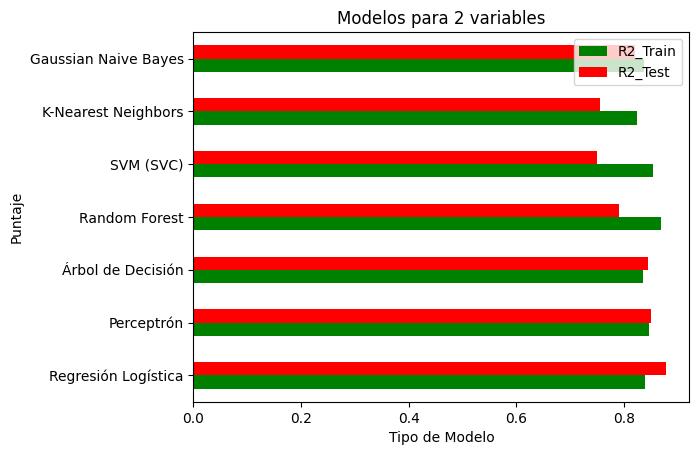

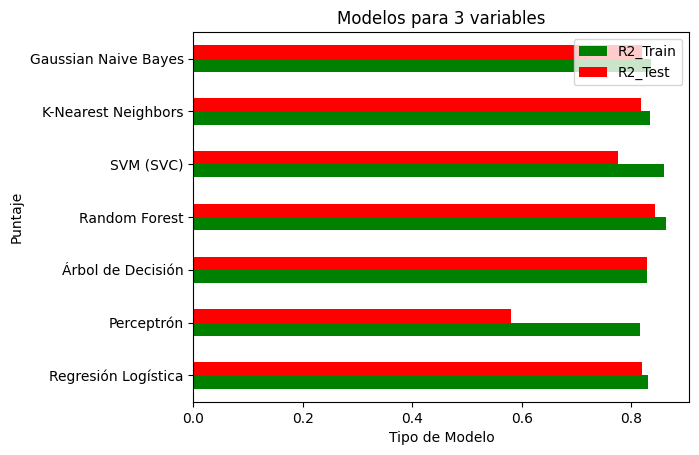

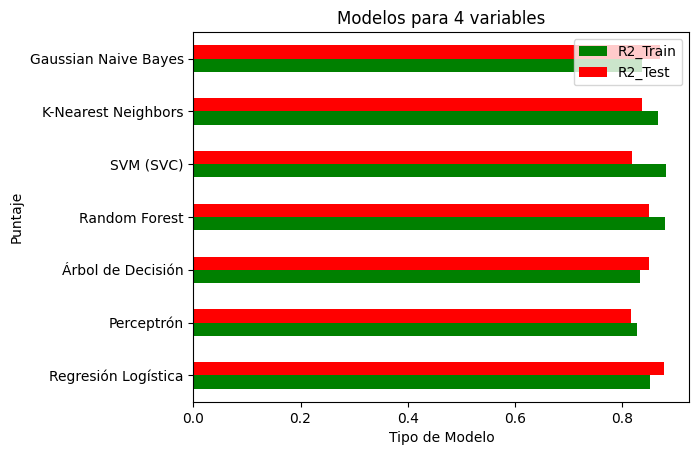

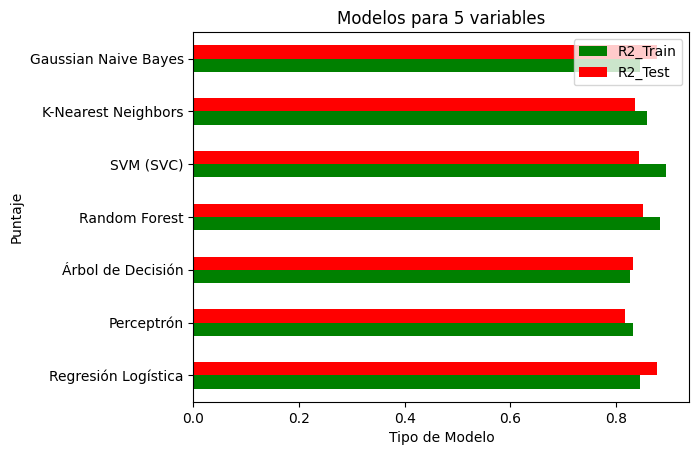

In [128]:
#Comparando modelos de clasificación
plt.figure(figsize=(12,8))
for num in df_results_clf.Num_Variables.unique():
  df_plot = df_results_clf[df_results_clf.Num_Variables == num].loc[:,["Tipo_Modelo", "R2_Train", "R2_Test"]]
  df_plot.set_index("Tipo_Modelo", inplace=True)
  df_plot.plot(kind="barh", xlabel="Tipo de Modelo", ylabel="Puntaje", title=f"Modelos para {num} variables", color=["g", "r"])

<p>En este caso, los modelos brindan resultados muy cercanos. A continuación, se explorarán los que mejor resultado dieron en las pruebas.

In [129]:
for num in df_results_clf.Num_Variables.unique():
  print(f"Modelos con {num} características")
  df_plot = df_results_clf[df_results_clf.Num_Variables == num].loc[:,["Tipo_Modelo", "R2_Train", "R2_Test"]]
  df_plot.set_index("Tipo_Modelo", inplace=True)
  print(df_plot.sort_values("R2_Test", ascending=False).head(3))
  print()

Modelos con 2 características
                     R2_Train   R2_Test
Tipo_Modelo                            
Regresión Logística  0.839816  0.878049
Perceptrón           0.846482  0.850000
Árbol de Decisión    0.835105  0.844444

Modelos con 3 características
                     R2_Train   R2_Test
Tipo_Modelo                            
Random Forest        0.863342  0.844444
Árbol de Decisión    0.829835  0.829268
Regresión Logística  0.830099  0.820513

Modelos con 4 características
                      R2_Train   R2_Test
Tipo_Modelo                             
Regresión Logística   0.851525  0.878049
Gaussian Naive Bayes  0.837924  0.871795
Árbol de Decisión     0.834661  0.851064

Modelos con 5 características
                      R2_Train   R2_Test
Tipo_Modelo                             
Regresión Logística   0.846534  0.878049
Gaussian Naive Bayes  0.845182  0.878049
Random Forest         0.884323  0.851064



<p>Según la salida anterior, el modelo con la mejor combinación de bondades parece ser Regresión Logística con 4 características, con un puntaje de entrenamiento de 0.85 y de prueba de 0.878. Aunque hay modelos con mayor puntaje de entrenamiento y/o prueba, este parece dar el mejor balance entre los datos con los que fue entrenado y los datos desconocidos.

#### Guardar modelo con mejor desempeño

In [130]:
#Modelo de clasificación
model = make_pipeline(
    MinMaxScaler(),
    PCA(n_components=4),
    LogisticRegression(random_state=42, penalty="l1", solver="liblinear")
).fit(X_train_clf, y_train_clf)

Accuracy:  0.8536585365853658
F1 Score:  0.8536585365853658
[[70 12]
 [12 70]]


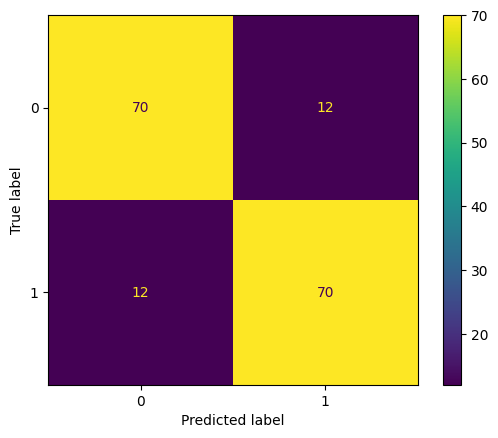

In [131]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

y_pred_clf_train = model.predict(X_train_clf)
print("Accuracy: ", accuracy_score(y_train_clf, y_pred_clf_train))
print("F1 Score: ", f1_score(y_train_clf, y_pred_clf_train))
print(confusion_matrix(y_train_clf, y_pred_clf_train))
ConfusionMatrixDisplay.from_predictions(y_train_clf, y_pred_clf_train)

Accuracy:  1.0
F1 Score:  1.0
[[21  0]
 [ 0 20]]


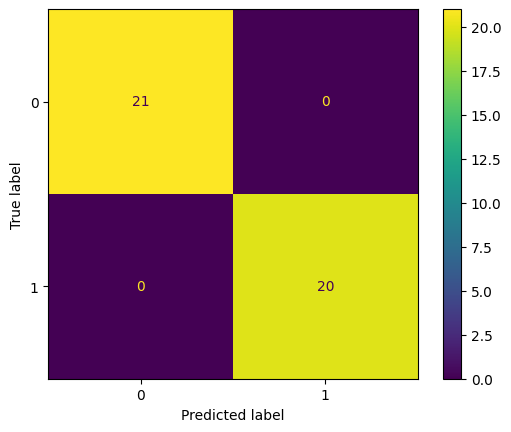

In [132]:
y_pred_clf_test = model.predict(X_test_clf)
print("Accuracy: ", accuracy_score(y_pred_clf_test, y_pred_clf_test))
print("F1 Score: ", f1_score(y_pred_clf_test, y_pred_clf_test))
print(confusion_matrix(y_pred_clf_test, y_pred_clf_test))
ConfusionMatrixDisplay.from_predictions(y_pred_clf_test, y_pred_clf_test)

In [133]:
#Guardar modelo
import pickle

pickle.dump(model, open('clf_logistic_reg.pkl', 'wb'))

In [134]:
import joblib

joblib.dump(model, open("clf_logistic_reg.joblib", "wb"))

## Estudio de los modelos de regresión con Selector de características

### Árbol de Decisión

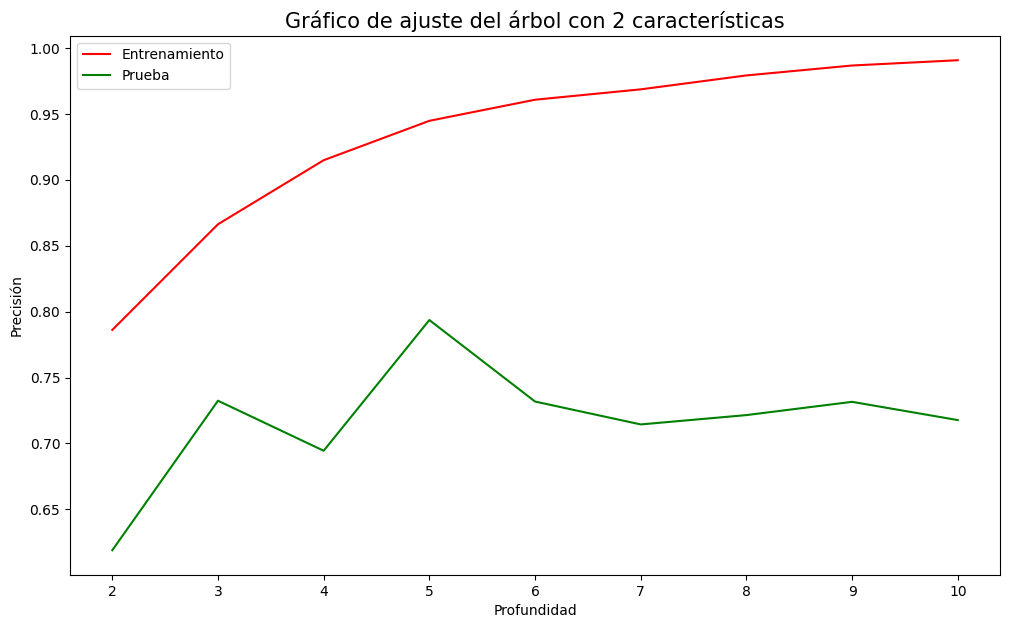

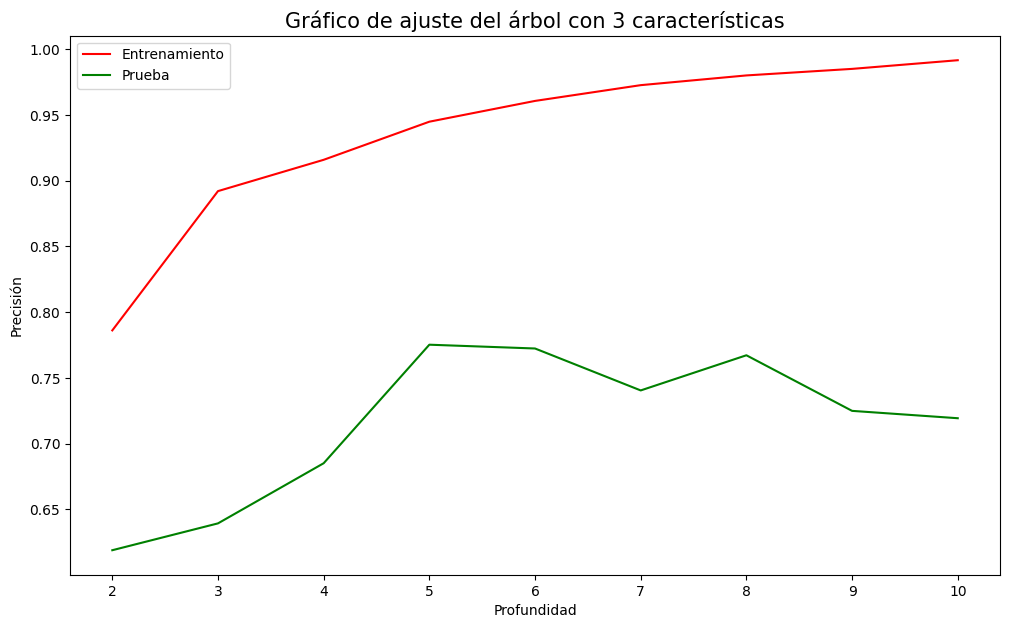

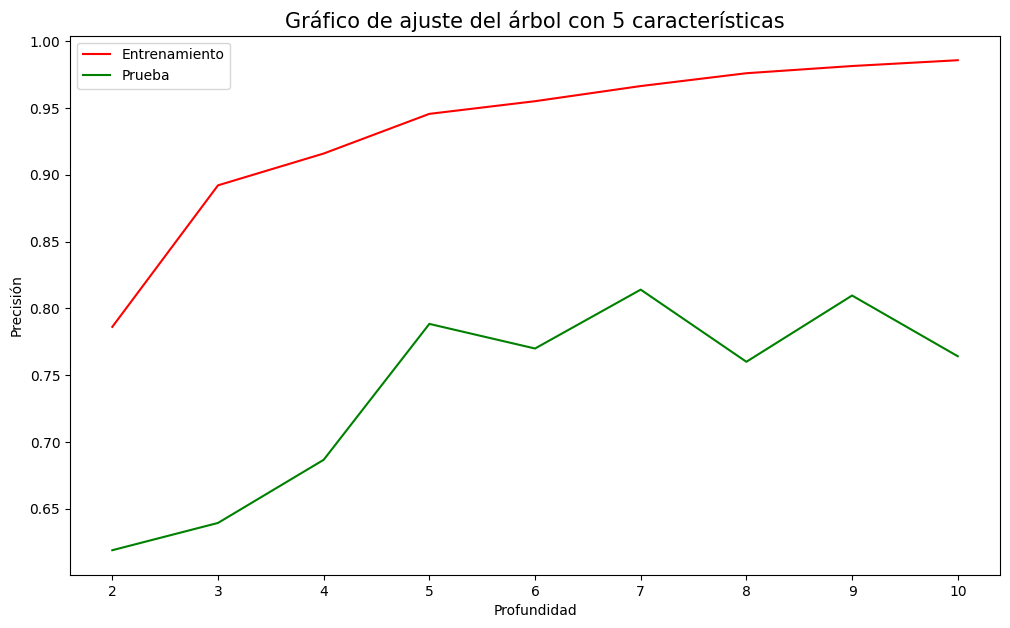

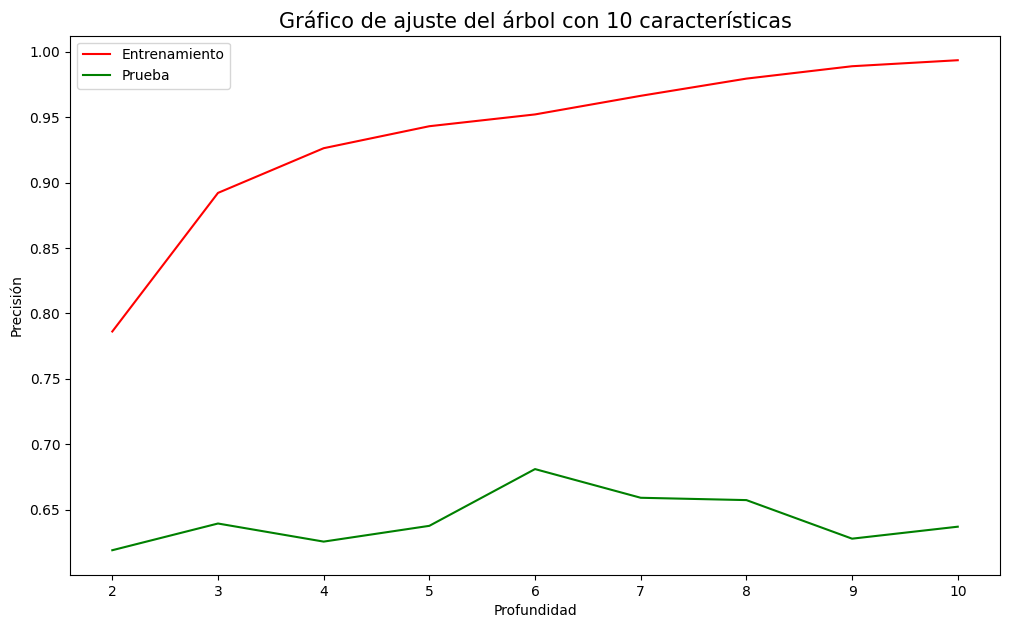

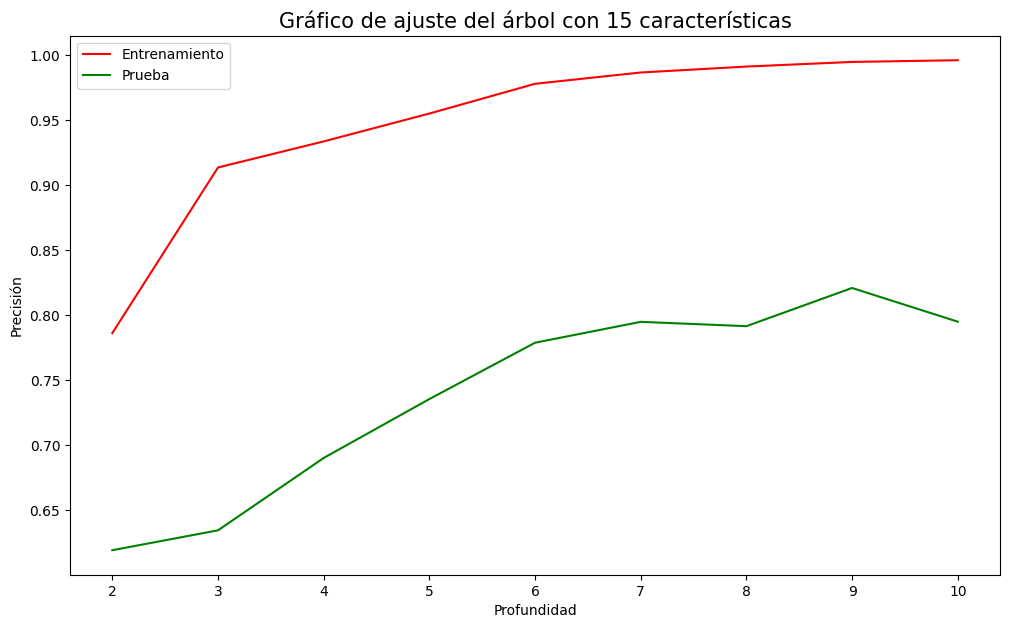

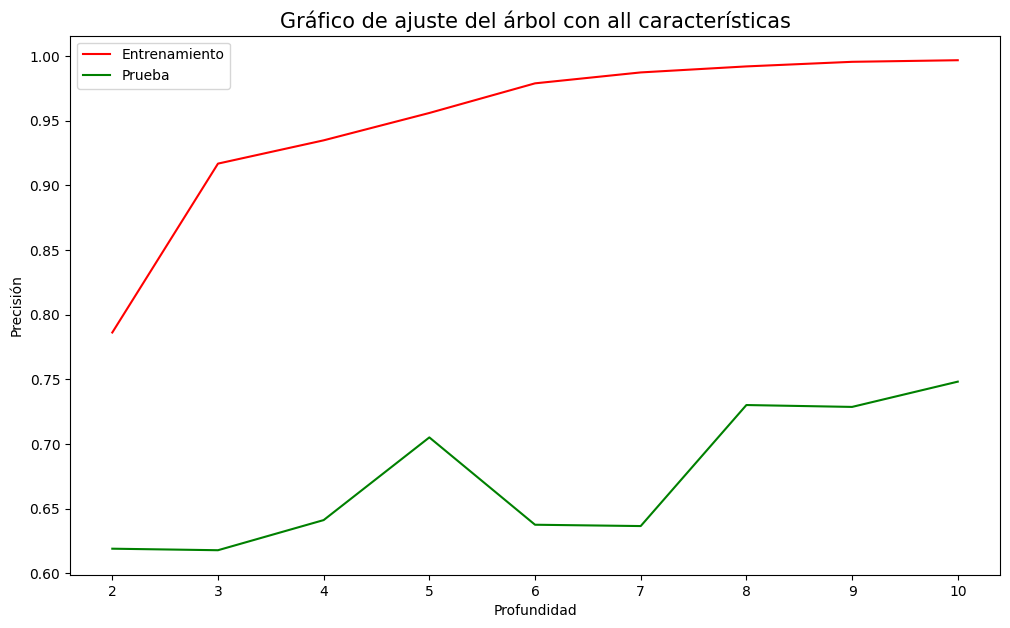

In [135]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression

train_prec =  []
test_prec = []
profundidades = range(2,11)

for k in [2, 3, 5, 10, 15, "all"]:
  selector = SelectKBest(k=k, score_func=mutual_info_regression)
  X_selected_train = selector.fit_transform(X_train_reg_esc, y_train_reg)
  X_selected_test = selector.transform(X_test_reg_esc)
  for deep in profundidades:
    clf = DecisionTreeRegressor(max_depth=deep, criterion="squared_error")
    clf.fit(X_selected_train, y_train_reg)
    train_prec.append(clf.score(X_selected_train, y_train_reg))
    test_prec.append(clf.score(X_selected_test, y_test_reg))

  plt.figure(figsize=(12,7))
  plt.plot(profundidades, train_prec, color='r', label='Entrenamiento')
  plt.plot(profundidades, test_prec, color='g', label='Prueba')
  plt.title(f'Gráfico de ajuste del árbol con {k} características', fontsize = 15)
  plt.legend()
  plt.ylabel('Precisión')
  plt.xlabel('Profundidad')
  plt.show()

  train_prec =  []
  test_prec = []

<p>Por tanto, el mejor ajuste se da con 3 características y una profundidad de 5.

In [136]:
model = make_pipeline(
    MinMaxScaler(),
    SelectKBest(k=3, score_func=mutual_info_regression),
    DecisionTreeRegressor(max_depth=deep, criterion="squared_error")
).fit(X_train_reg, y_train_reg)

In [137]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = model.predict(X_train_reg)
print("MSE: ", mean_squared_error(y_train_reg, y_train_pred))
print("MAE: ", mean_absolute_error(y_train_reg, y_train_pred))
print("R2: ", r2_score(y_train_reg, y_train_pred))

MSE:  500757.31214430893
MAE:  299.9371951219512
R2:  0.991603362799744


In [138]:
y_test_pred = model.predict(X_test_reg)
print("MSE: ", mean_squared_error(y_test_reg, y_test_pred))
print("MAE: ", mean_absolute_error(y_test_reg, y_test_pred))
print("R2: ", r2_score(y_test_reg, y_test_pred))

MSE:  21345907.55101757
MAE:  2665.4690739329267
R2:  0.7296070408155746


#### Guardar modelo

In [139]:
pickle.dump(model, open('reg_arbol.pkl', 'wb'))

In [140]:
joblib.dump(model, open('reg_arbol.joblib', 'wb'))